In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from src.visualize import LossVisualizer
from src.utils import init_dataloader
from src.utils import create_losses_func
from src.models.mlp import MLP
from src.train import train
from src.valid import valid
from src.models.conv import ConvNet

import numpy as np

from torchvision import transforms

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from src.train import train_and_log

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 16,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}
plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"

In [6]:
def show_best(train_metrics, valid_metrics, target_metric = 'accuracy', minimize_metric = False):
    best_epoch = np.argmin(valid_metrics[target_metric]) if minimize_metric else np.argmax(valid_metrics[target_metric])
    print(f'best_epoch: {best_epoch+1}')
    print(f"best valid accuracy: {valid_metrics['accuracy'][best_epoch]}")
    print(f"best valid loss: {valid_metrics['loss'][best_epoch]}")

def visualize_train_process(
    train_metrics, valid_metrics
):
    fig, axs = plt.subplots(figsize = (16, 5), ncols = 2, nrows = 1)
    grid = np.arange(1, len(train_metrics['loss'])+1)
    axs[0].plot(grid, train_metrics['loss'], label = 'train')
    axs[0].plot(grid, valid_metrics['loss'], label = 'valid')
    axs[1].plot(grid, train_metrics['accuracy'], label = 'train')
    axs[1].plot(grid, valid_metrics['accuracy'], label = 'valid')
    axs[0].set(
        title = 'loss',
        xlabel = 'epoch',
        xticks = grid
    )
    axs[1].set(
        title = 'accuracy',
        xlabel = 'epoch',
        xticks = grid
    )
    axs[0].legend()
    axs[1].legend()

In [7]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])

train_loader = init_dataloader(
    dataset_name='CIFAR10',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=True,
    size = 64*(10000//64)
)

valid_loader = init_dataloader(
    dataset_name='CIFAR10',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=False,
    size = 64*(10000//64)
)

num_epochs = 20

model_no_bn_no_dropout = MLP(
    layers_num=4,
    hidden=128,
    input_channels=3,
    input_sizes=(32, 32),
    classes=10
).to(DEVICE)
optimizer = torch.optim.Adam(model_no_bn_no_dropout.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()


model_no_bn_no_dropout, train_metrics, valid_metrics = train_and_log(
    model_no_bn_no_dropout,
    optimizer,
    criterion,
    train_loader,
    valid_loader,
    num_epochs = num_epochs,
    device=DEVICE
)

Files already downloaded and verified
Files already downloaded and verified


best_epoch: 7
best valid accuracy: 0.4521233974358974
best valid loss: 1.5668108119414403


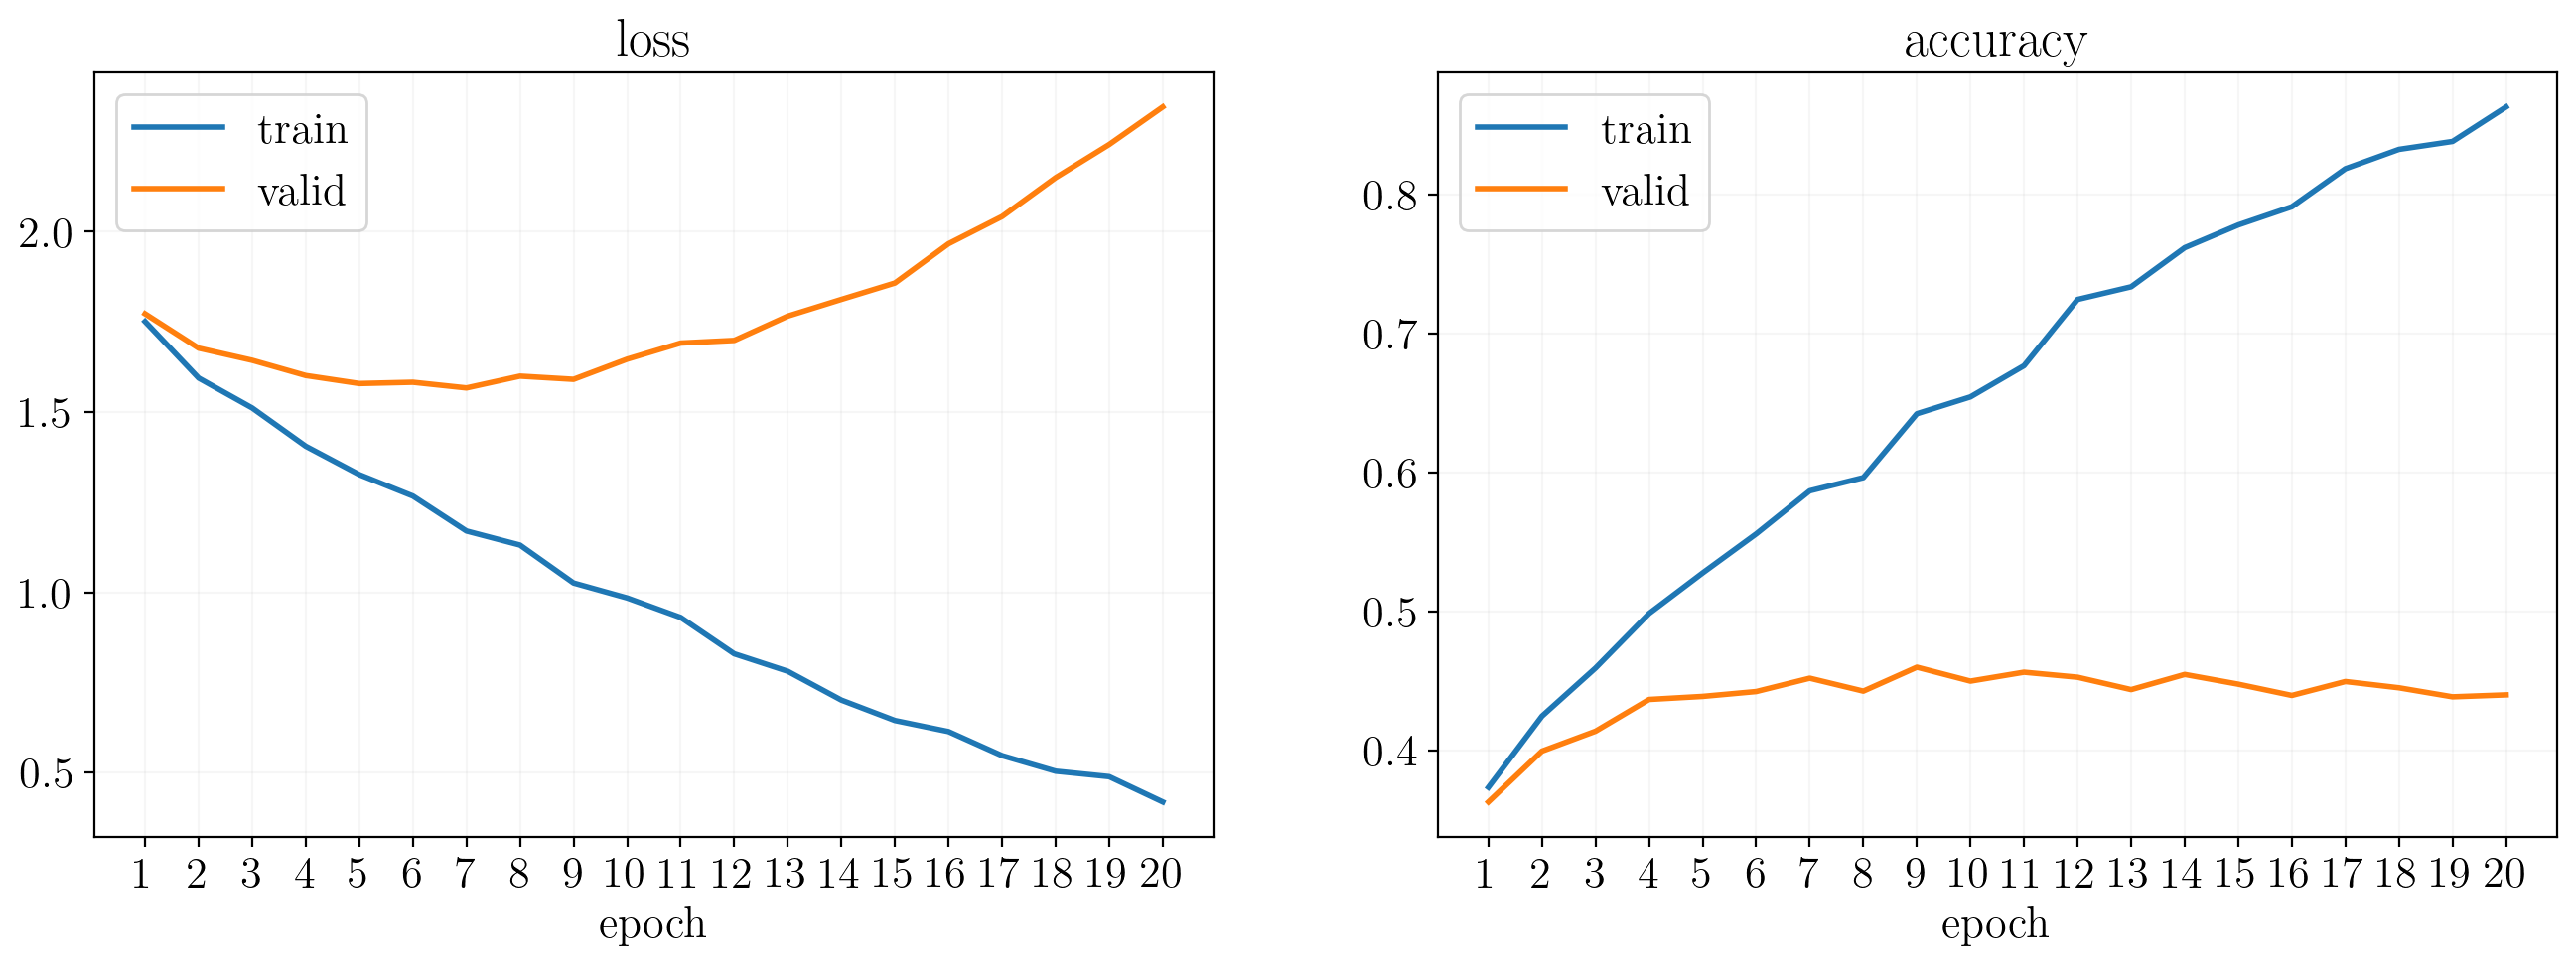

In [8]:
visualize_train_process(train_metrics, valid_metrics)
show_best(train_metrics, valid_metrics, target_metric = 'loss', minimize_metric = True)

best_epoch: 5
best valid accuracy: 0.44551282051282054
best valid loss: 1.5889500264938061


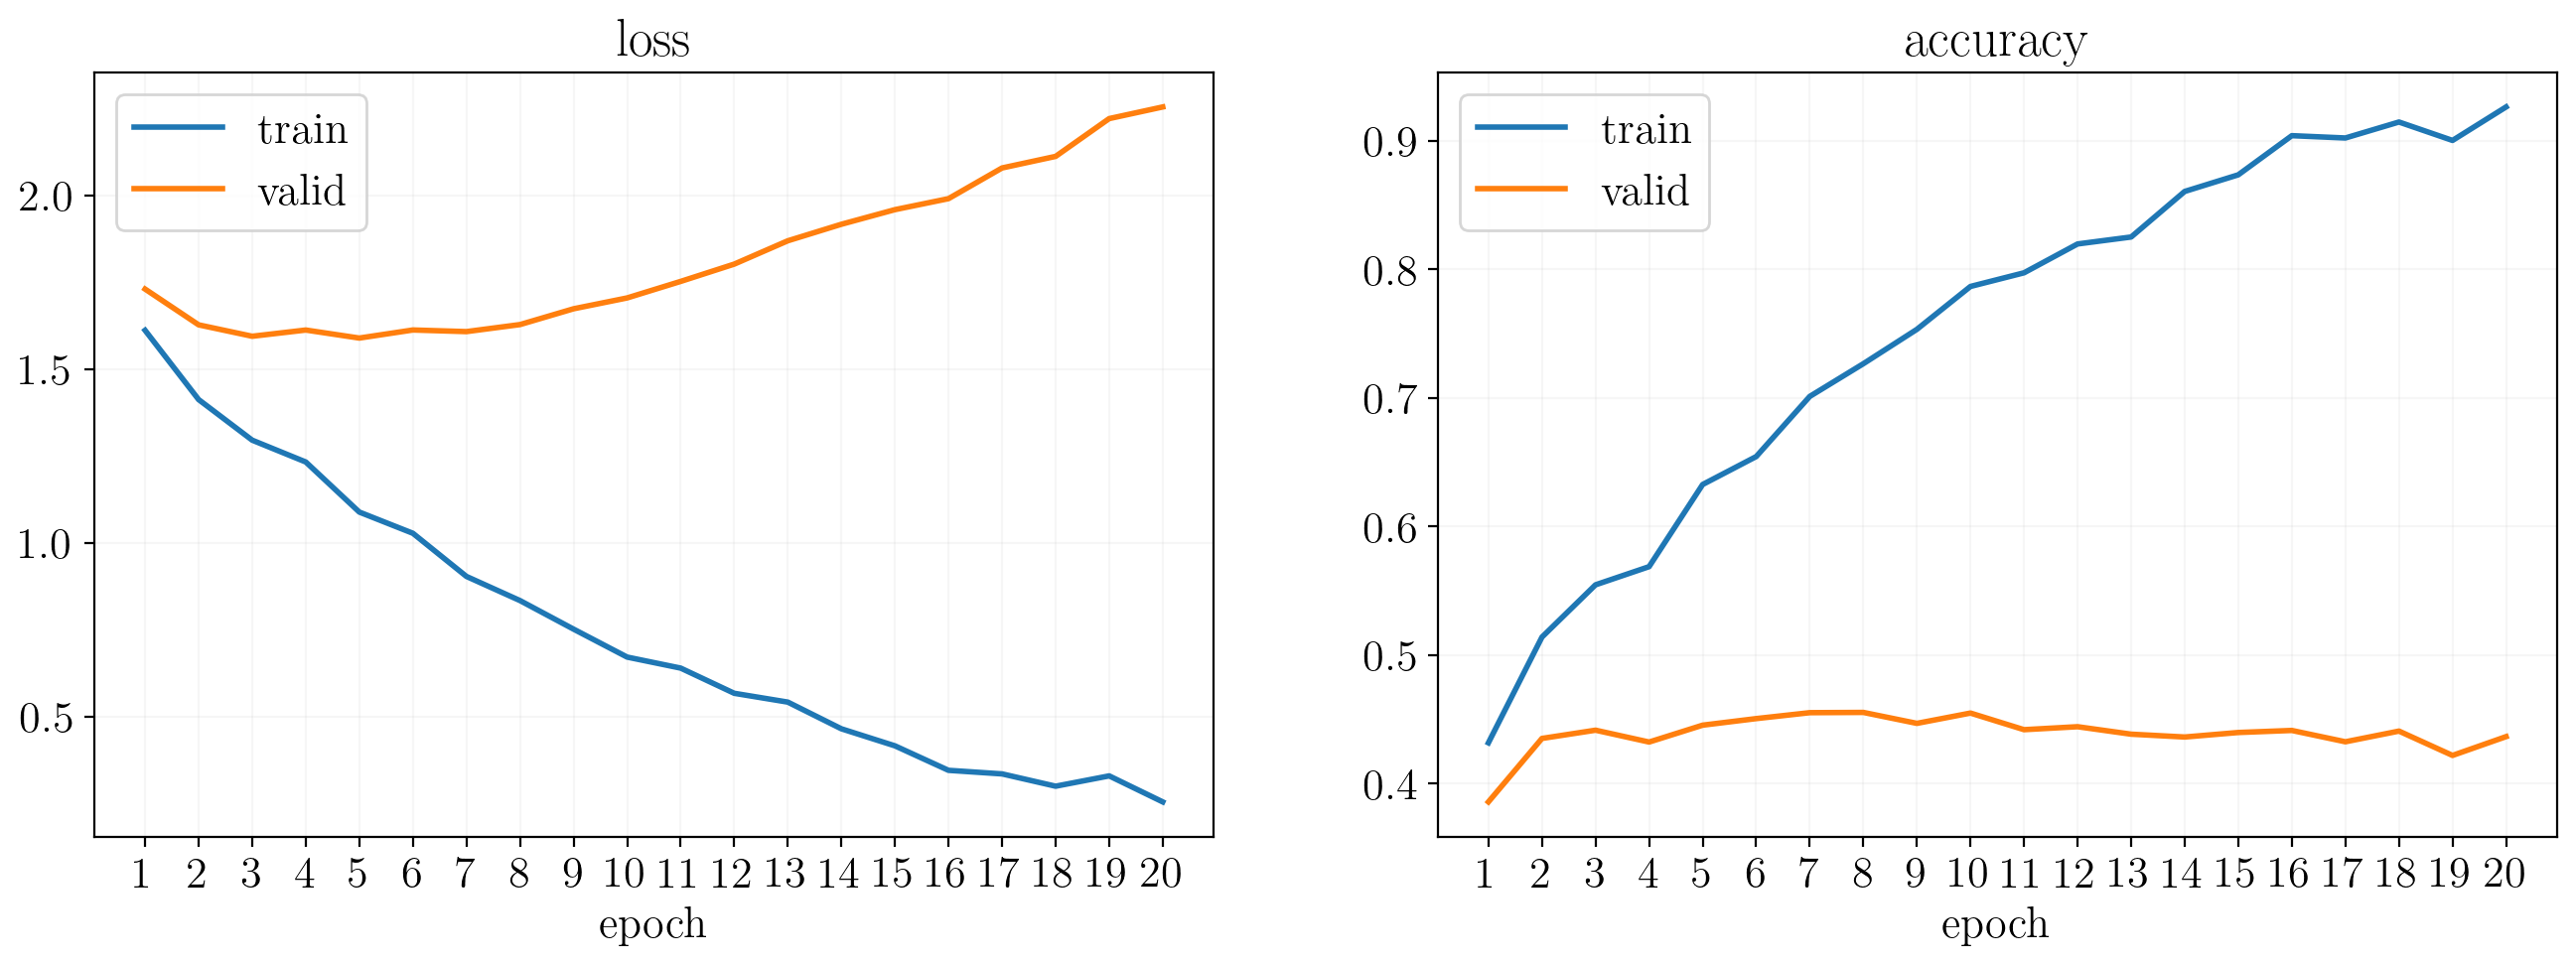

In [9]:
model_no_dropout = MLP(
    layers_num=4,
    hidden=128,
    input_channels=3,
    input_sizes=(32, 32),
    classes=10,
    norm_class=nn.BatchNorm1d
).to(DEVICE)
optimizer = torch.optim.Adam(model_no_dropout.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()
model_no_dropout, train_metrics, valid_metrics = train_and_log(
    model_no_dropout,
    optimizer,
    criterion,
    train_loader,
    valid_loader,
    num_epochs = num_epochs,
    device=DEVICE
)
visualize_train_process(train_metrics, valid_metrics)
show_best(train_metrics, valid_metrics, target_metric = 'loss', minimize_metric = True)

best_epoch: 9
best valid accuracy: 0.46955128205128205
best valid loss: 1.5224290237976954


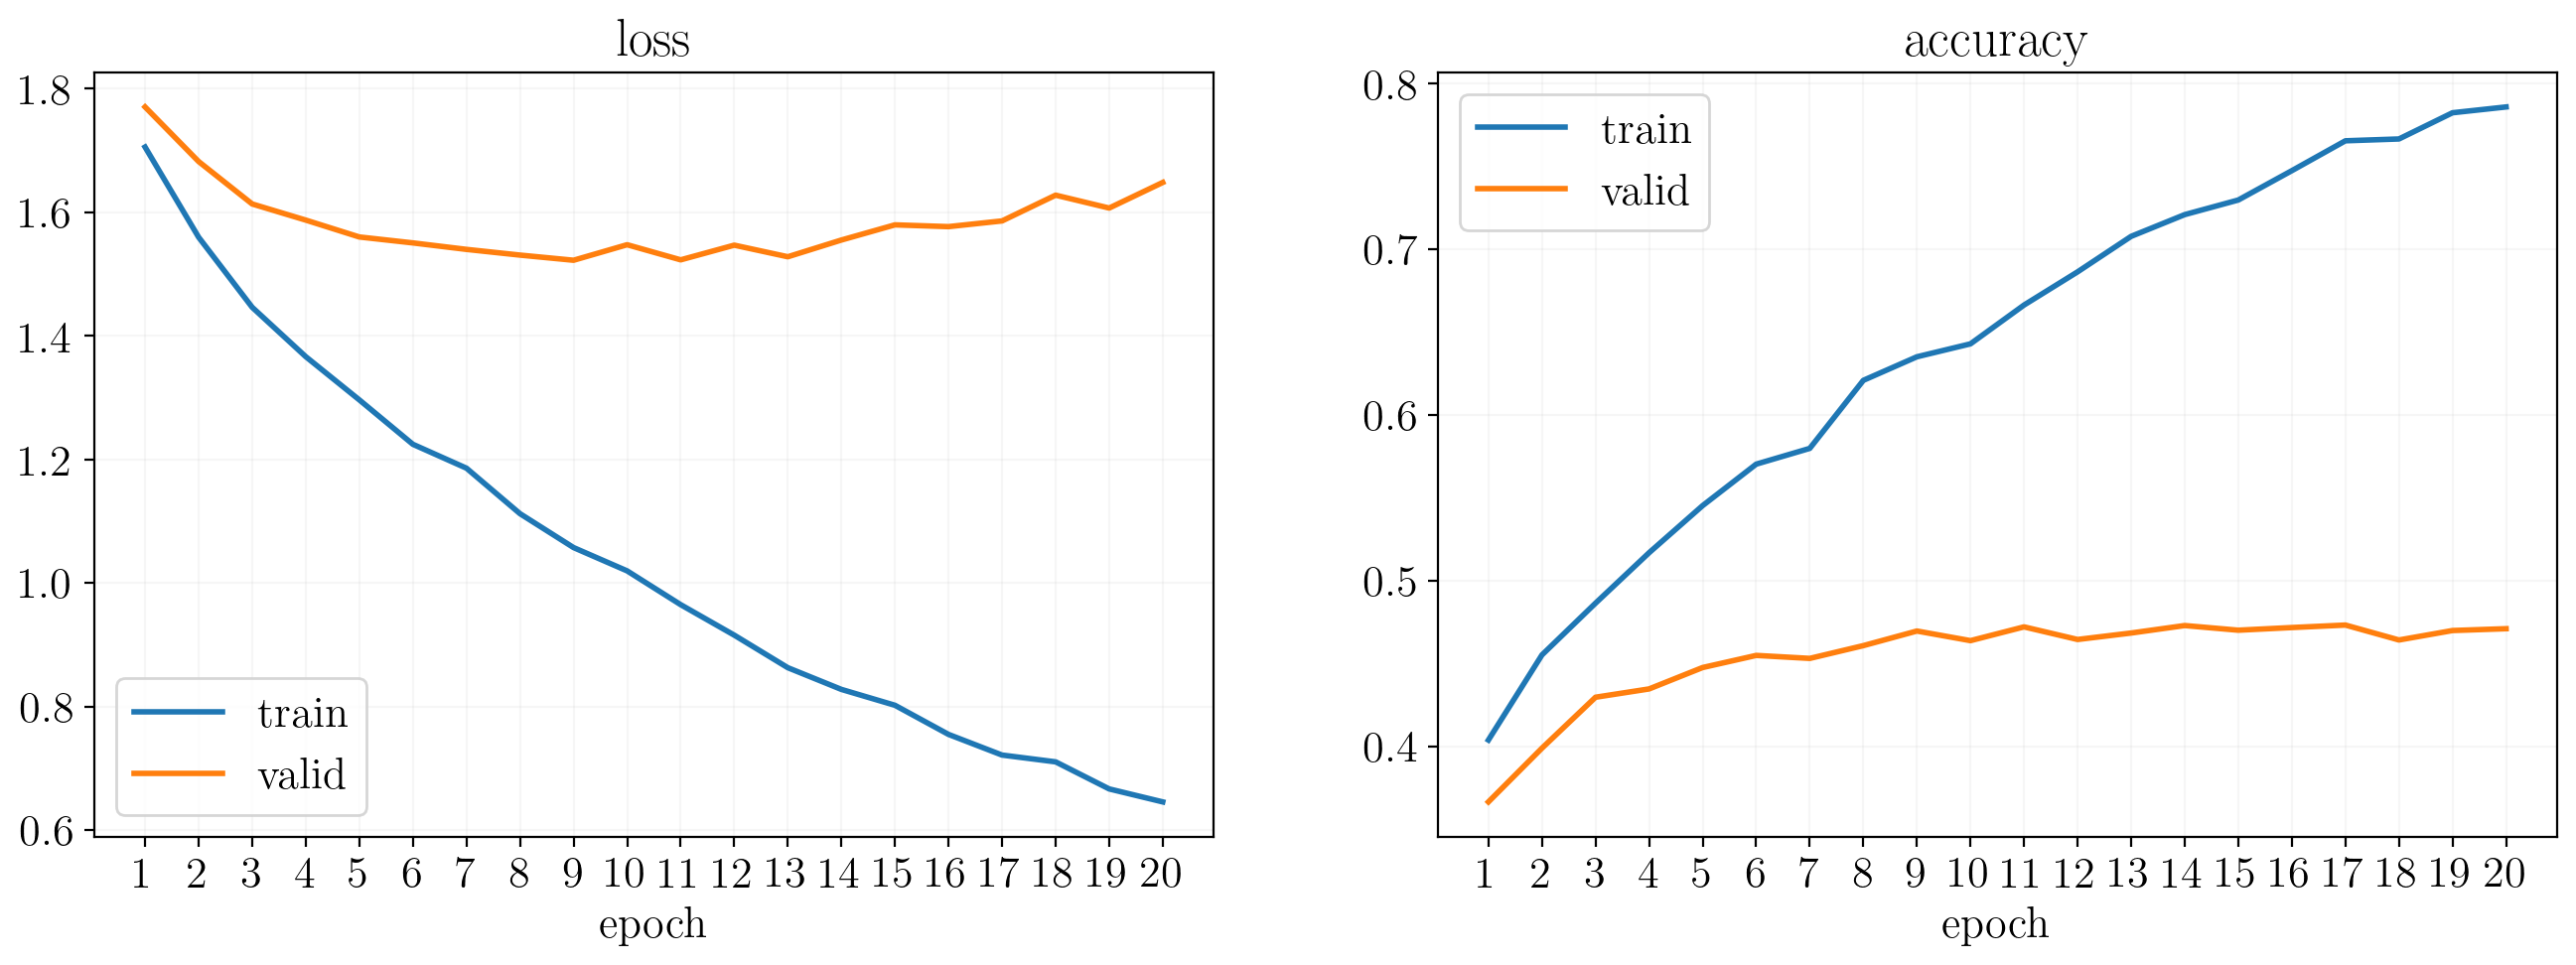

In [10]:
model = MLP(
    layers_num=4,
    hidden=128,
    input_channels=3,
    input_sizes=(32, 32),
    classes=10,
    norm_class=nn.BatchNorm1d,
    dropout_p=0.1
).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()
model, train_metrics, valid_metrics = train_and_log(
    model,
    optimizer,
    criterion,
    train_loader,
    valid_loader,
    num_epochs = 20,
    device=DEVICE
)
visualize_train_process(train_metrics, valid_metrics)
show_best(train_metrics, valid_metrics, target_metric = 'loss', minimize_metric = True)

In [13]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])

loader = init_dataloader(
    dataset_name='CIFAR10',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=True,
    size = 64*(10000//64)
)

model_no_bn_no_dropout = MLP(
    layers_num=4,
    hidden=128,
    input_channels=3,
    input_sizes=(32, 32),
    classes=10
).to(DEVICE)
optimizer = torch.optim.Adam(model_no_bn_no_dropout.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()

model_no_bn_no_dropout, losses = train(
    model_no_bn_no_dropout,
    optimizer,
    criterion,
    loader,
    7,
    DEVICE
)

model_no_dropout = MLP(
    layers_num=4,
    hidden=128,
    input_channels=3,
    input_sizes=(32, 32),
    classes=10,
    norm_class=nn.BatchNorm1d
).to(DEVICE)
optimizer = torch.optim.Adam(model_no_dropout.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()

model_no_dropout, losses = train(
    model_no_dropout,
    optimizer,
    criterion,
    loader,
    5,
    DEVICE
)

model = MLP(
    layers_num=4,
    hidden=128,
    input_channels=3,
    input_sizes=(32, 32),
    classes=10,
    norm_class=nn.BatchNorm1d,
    dropout_p=0.1
).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()

model, losses = train(
    model,
    optimizer,
    criterion,
    loader,
    9,
    DEVICE
)

Files already downloaded and verified


In [14]:
losses_func = create_losses_func(loader, criterion)
vis_no_bn_no_dropout = LossVisualizer(visual_type='random_2', grid_step=0.1, direction_norm=20)
vis_no_bn_no_dropout.initialize_grid_loss(model_no_bn_no_dropout, losses_func)

losses_func = create_losses_func(loader, criterion)
vis_no_dropout = LossVisualizer(visual_type='random_2', grid_step=0.1, direction_norm=20)
vis_no_dropout.initialize_grid_loss(model_no_dropout, losses_func)

losses_func = create_losses_func(loader, criterion)
vis = LossVisualizer(visual_type='random_2', grid_step=0.1, direction_norm=20)
vis.initialize_grid_loss(model, losses_func)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

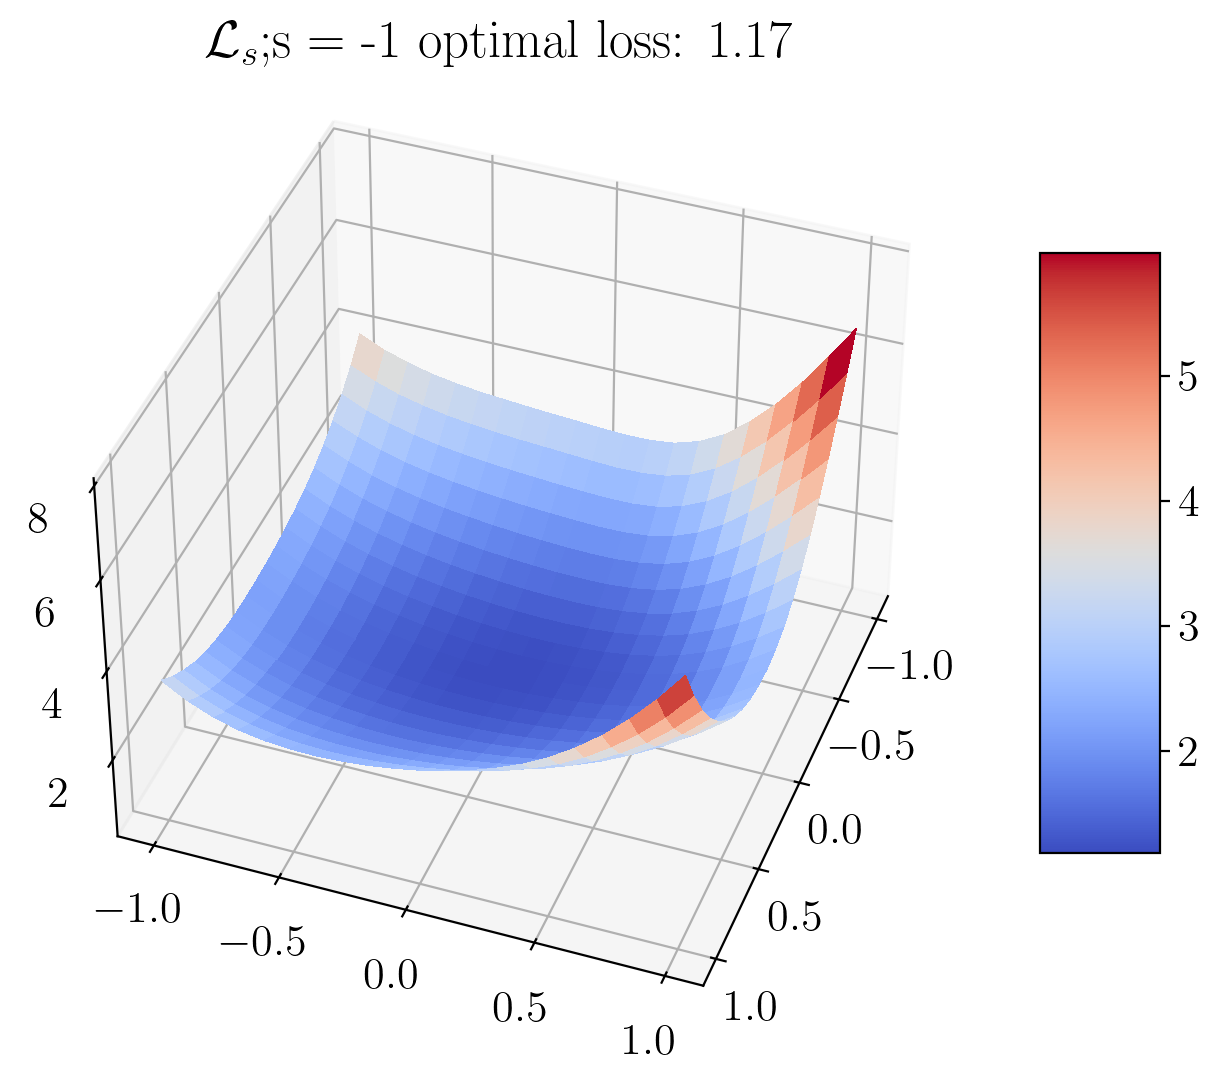

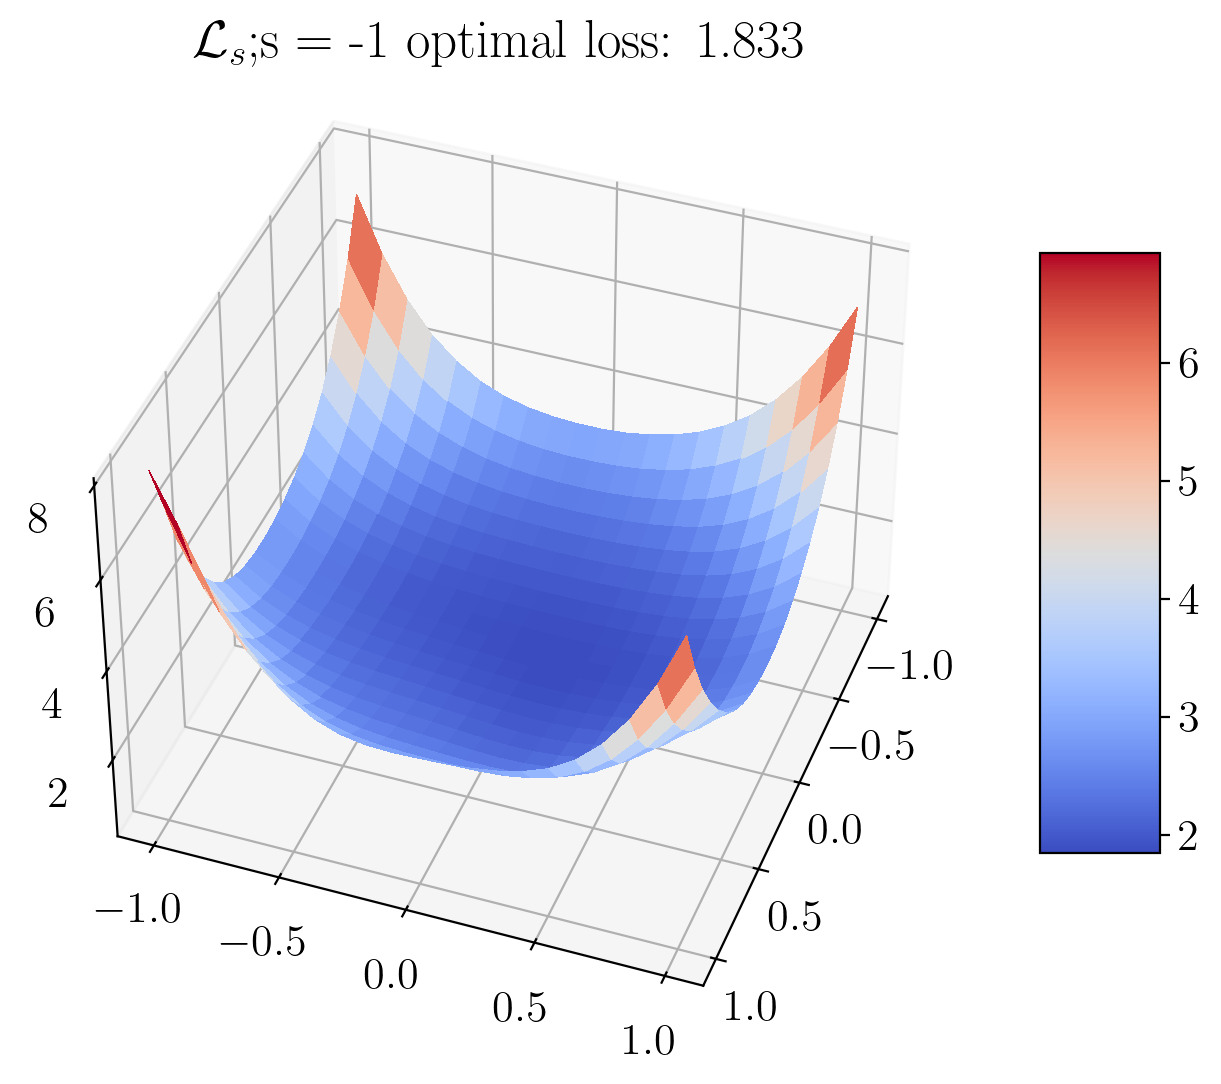

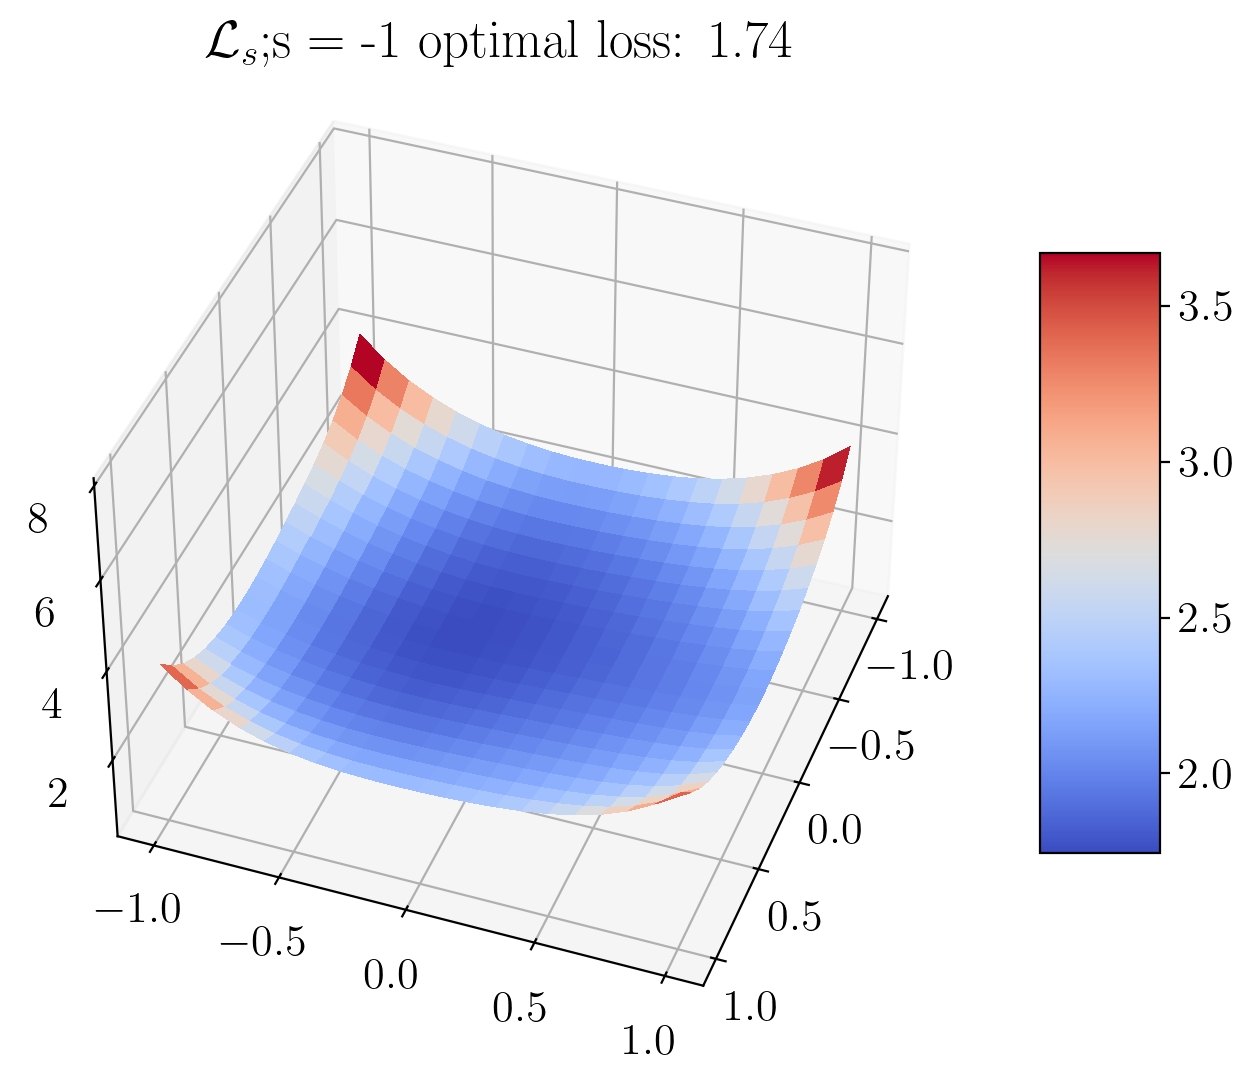

In [17]:
vis_no_bn_no_dropout.visualize(size = -1, z_grid_bounds=[0.4, 8])
vis_no_dropout.visualize(size = -1, z_grid_bounds=[0.4, 8])
vis.visualize(size = -1, z_grid_bounds=[0.4, 8])

In [ ]:
# vis_no_bn_no_dropout.visualize_diff(size1 = 8, 
#                                     size2 = -1, 
#                                     diff_type='square')
# vis_no_dropout.visualize_diff(size1 = 8, 
#                               size2 = -1, 
#                               diff_type='square')
# vis.visualize_diff(size1 = 8, 
#                    size2 = -1, 
#                    diff_type='square')

In [ ]:
# vis_no_bn_no_dropout.visualize_diff(size1 = 8, size2 = -1, diff_type='relative_square')
# vis_no_dropout.visualize_diff(size1 = 8, size2 = -1, diff_type='relative_square')
# vis.visualize_diff(size1 = 8, size2 = -1, diff_type='relative_square')

In [ ]:
# vis_no_bn_no_dropout.visualize_diff(size1 = 8, 
#                                     size2 = -1, 
#                                     diff_type='square_dot_normal',
#                                     distrib_params = {'loc':[0,0], 'scale':[0.5, 0.5]})

# vis_no_dropout.visualize_diff(size1 = 8, 
#                               size2 = -1, 
#                               diff_type='square_dot_normal',
#                               distrib_params = {'loc':[0,0], 'scale':[0.5, 0.5]})

# vis.visualize_diff(size1 = 8, 
#                    size2 = -1, 
#                    diff_type='square_dot_normal',
#                    distrib_params = {'loc':[0,0], 'scale':[0.5, 0.5]})

#### Same with convolutions

best_epoch: 8
best valid accuracy: 0.5784254807692307
best valid loss: 1.2182545371544666


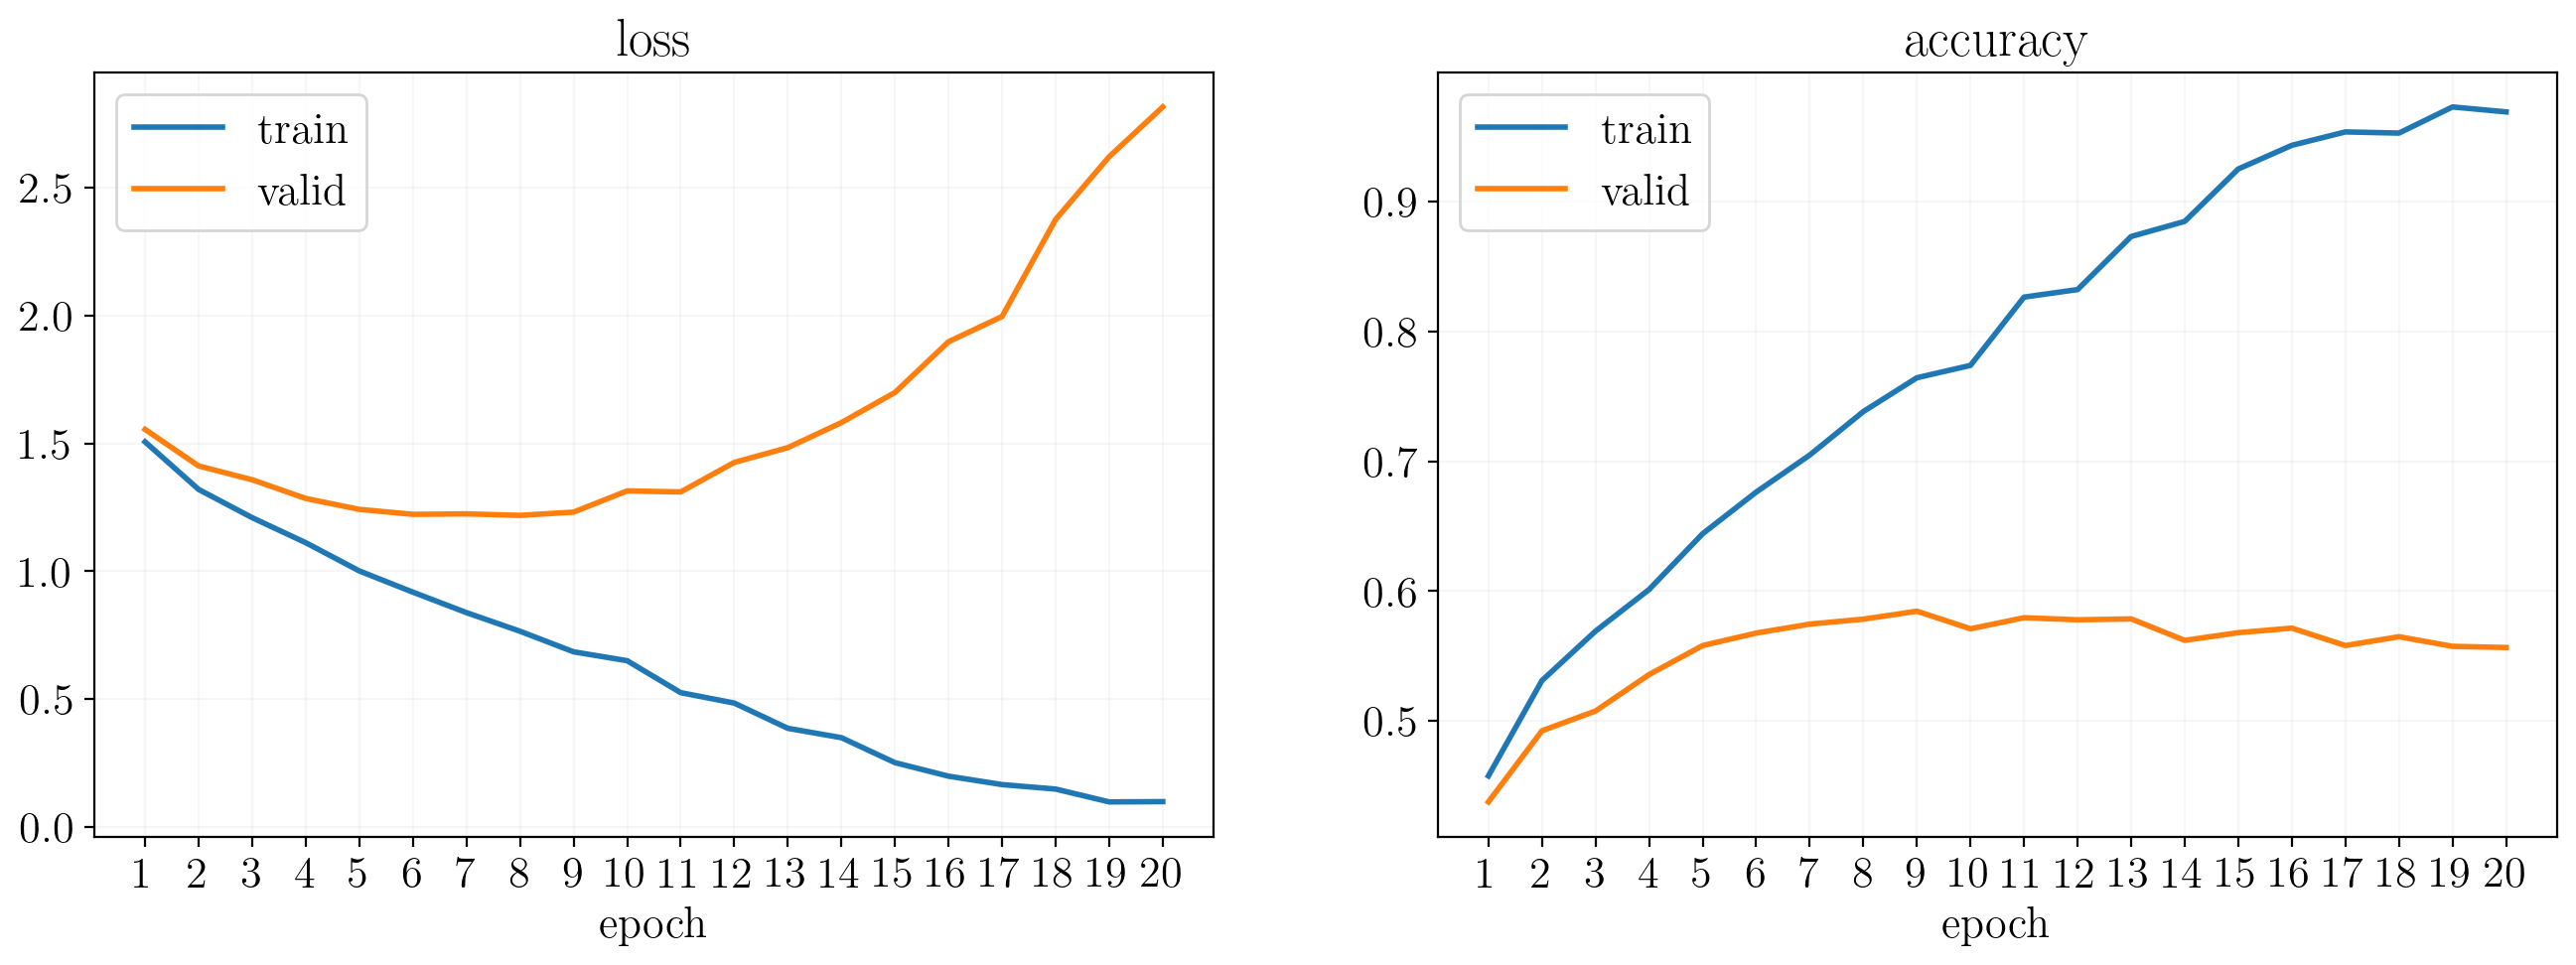

In [18]:
model_no_bn_no_dropout = ConvNet(
    layers_num=4,
    hidden_channels=64,
    kernel_size=3,
    padding=1,
    input_channels=3,
    output_channels=32,
    input_sizes=(32, 32),
    classes=10,
).to(DEVICE)

optimizer = torch.optim.Adam(model_no_bn_no_dropout.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()


model_no_bn_no_dropout, train_metrics, valid_metrics = train_and_log(
    model_no_bn_no_dropout,
    optimizer,
    criterion,
    train_loader,
    valid_loader,
    num_epochs = 20,
    device=DEVICE
)
visualize_train_process(train_metrics, valid_metrics)
show_best(train_metrics, valid_metrics, target_metric = 'loss', minimize_metric = True)

best_epoch: 2
best valid accuracy: 0.5620993589743589
best valid loss: 1.2522119020040219


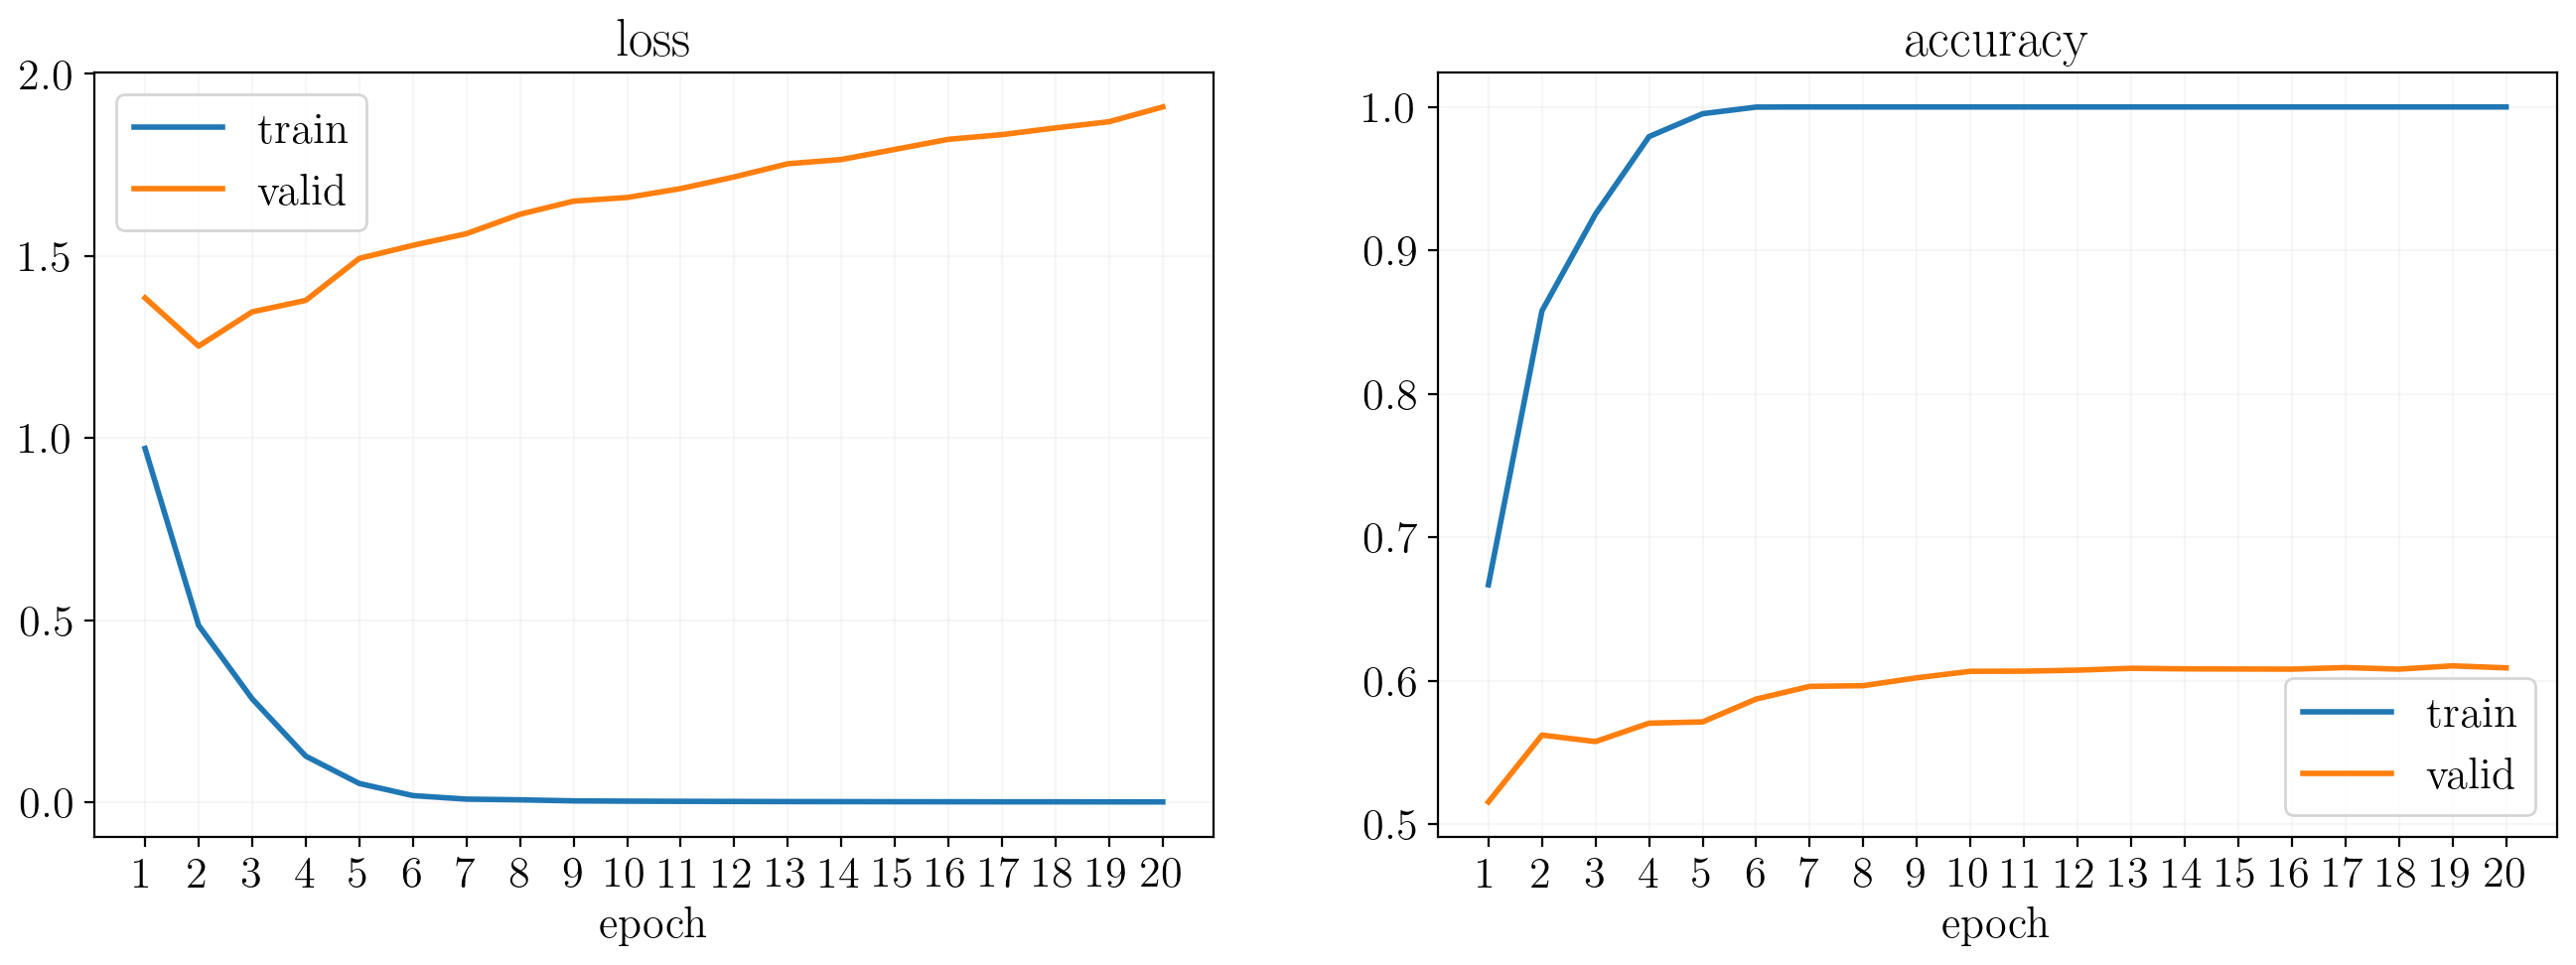

In [19]:
model_no_dropout = ConvNet(
    layers_num=4,
    hidden_channels=64,
    kernel_size=3,
    padding=1,
    input_channels=3,
    output_channels=32,
    input_sizes=(32, 32),
    classes=10,
    norm_class=nn.BatchNorm2d
).to(DEVICE)

optimizer = torch.optim.Adam(model_no_dropout.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()


model_no_dropout, train_metrics, valid_metrics = train_and_log(
    model_no_dropout,
    optimizer,
    criterion,
    train_loader,
    valid_loader,
    num_epochs = 20,
    device=DEVICE
)
visualize_train_process(train_metrics, valid_metrics)
show_best(train_metrics, valid_metrics, target_metric = 'loss', minimize_metric = True)

best_epoch: 2
best valid accuracy: 0.539863782051282
best valid loss: 1.3045344138756776


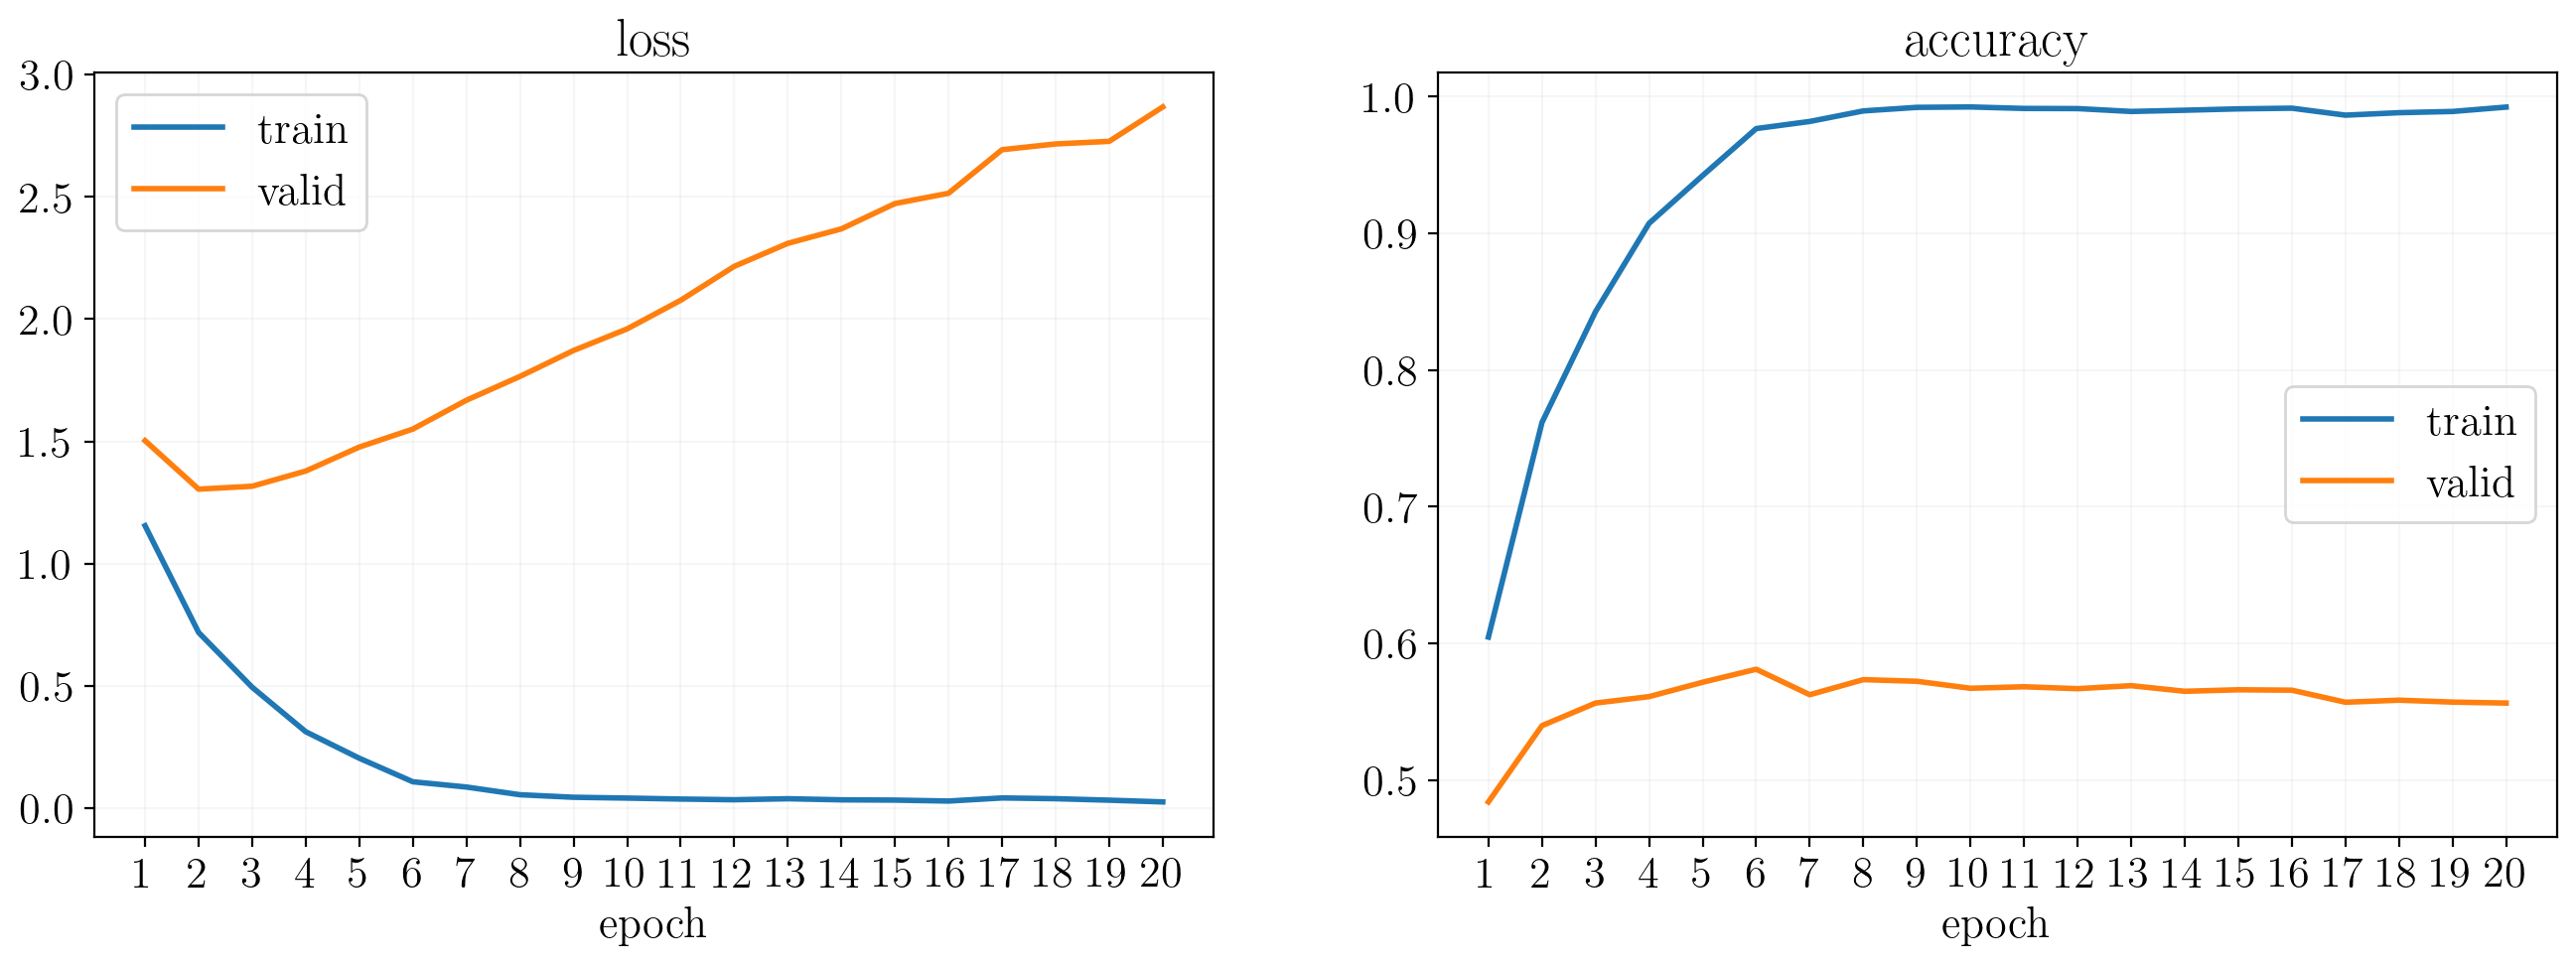

In [20]:
model = ConvNet(
    layers_num=4,
    hidden_channels=64,
    kernel_size=3,
    padding=1,
    input_channels=3,
    output_channels=32,
    input_sizes=(32, 32),
    classes=10,
    norm_class = nn.BatchNorm2d,
    dropout_p=0.1
).to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()

model, train_metrics, valid_metrics = train_and_log(
    model,
    optimizer,
    criterion,
    train_loader,
    valid_loader,
    num_epochs = 20,
    device=DEVICE
)
visualize_train_process(train_metrics, valid_metrics)
show_best(train_metrics, valid_metrics, target_metric = 'loss', minimize_metric = True)

In [21]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])

loader = init_dataloader(
    dataset_name='CIFAR10',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=True,
    size = 64*(10000//64)
)

model_no_bn_no_dropout = ConvNet(
    layers_num=4,
    hidden_channels=64,
    kernel_size=3,
    padding=1,
    input_channels=3,
    output_channels=32,
    input_sizes=(32, 32),
    classes=10,
).to(DEVICE)

optimizer = torch.optim.Adam(model_no_bn_no_dropout.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()

model_no_bn_no_dropout, losses = train(
    model_no_bn_no_dropout,
    optimizer,
    criterion,
    loader,
    8,
    DEVICE
)

model_no_dropout = ConvNet(
    layers_num=4,
    hidden_channels=64,
    kernel_size=3,
    padding=1,
    input_channels=3,
    output_channels=32,
    input_sizes=(32, 32),
    classes=10,
    norm_class=nn.BatchNorm2d
).to(DEVICE)

optimizer = torch.optim.Adam(model_no_dropout.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()

model_no_dropout, losses = train(
    model_no_dropout,
    optimizer,
    criterion,
    loader,
    2,
    DEVICE
)

model = ConvNet(
    layers_num=4,
    hidden_channels=64,
    kernel_size=3,
    padding=1,
    input_channels=3,
    output_channels=32,
    input_sizes=(32, 32),
    classes=10,
    norm_class = nn.BatchNorm2d,
    dropout_p=0.1
).to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()

model, losses = train(
    model,
    optimizer,
    criterion,
    loader,
    2,
    DEVICE
)

Files already downloaded and verified


In [22]:
losses_func = create_losses_func(loader, criterion)
vis_no_bn_no_dropout = LossVisualizer(visual_type='random_2', grid_step=0.1, direction_norm=16)
vis_no_bn_no_dropout.initialize_grid_loss(model_no_bn_no_dropout, losses_func)

losses_func = create_losses_func(loader, criterion)
vis_no_dropout = LossVisualizer(visual_type='random_2', grid_step=0.1, direction_norm=16)
vis_no_dropout.initialize_grid_loss(model_no_dropout, losses_func)

losses_func = create_losses_func(loader, criterion)
vis = LossVisualizer(visual_type='random_2', grid_step=0.1, direction_norm=16)
vis.initialize_grid_loss(model, losses_func)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

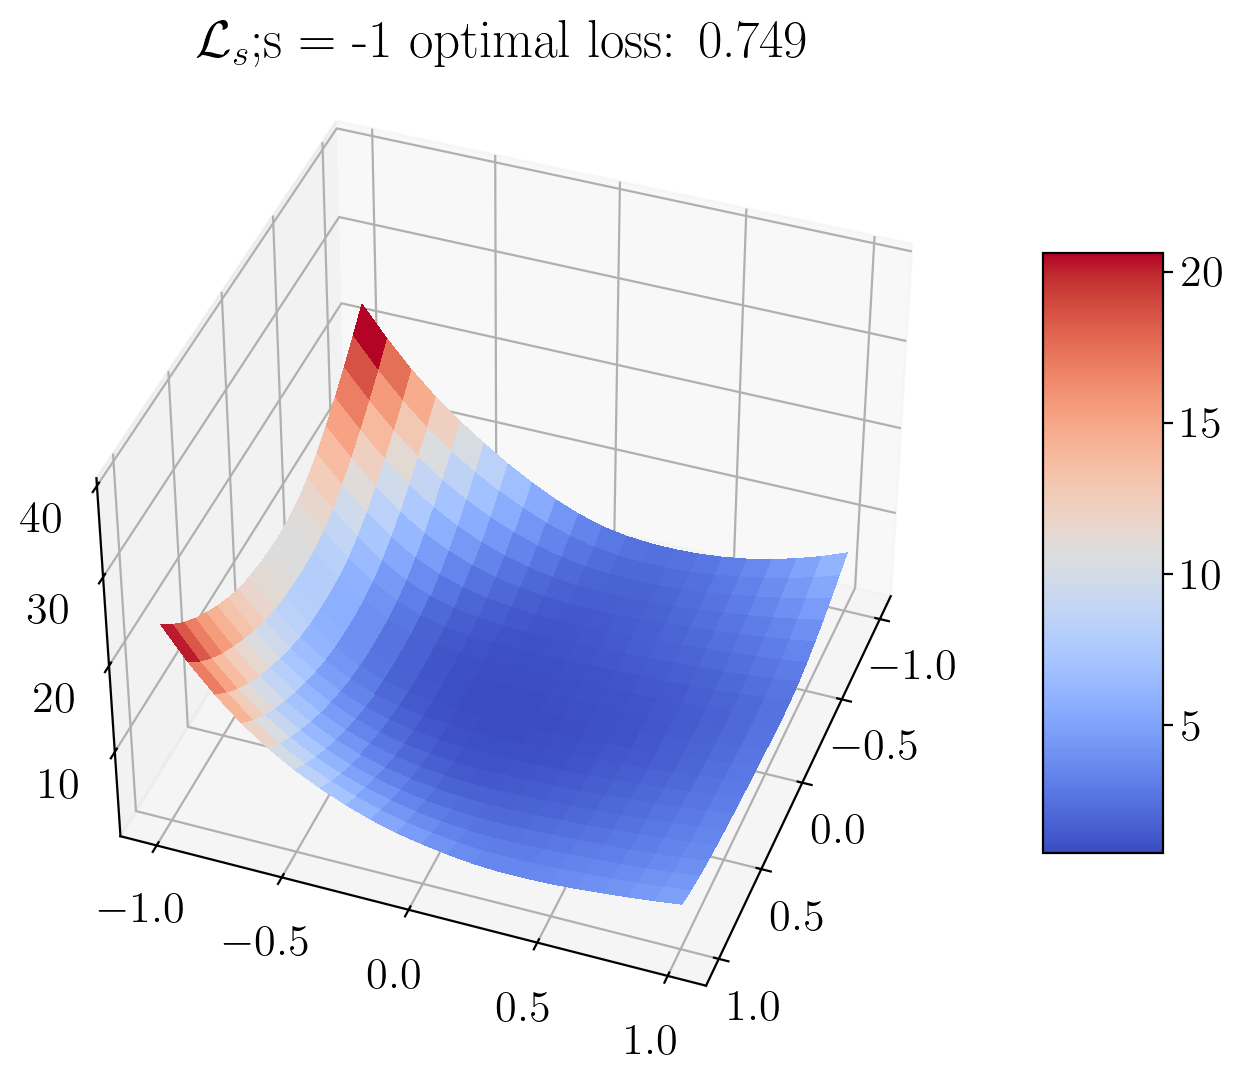

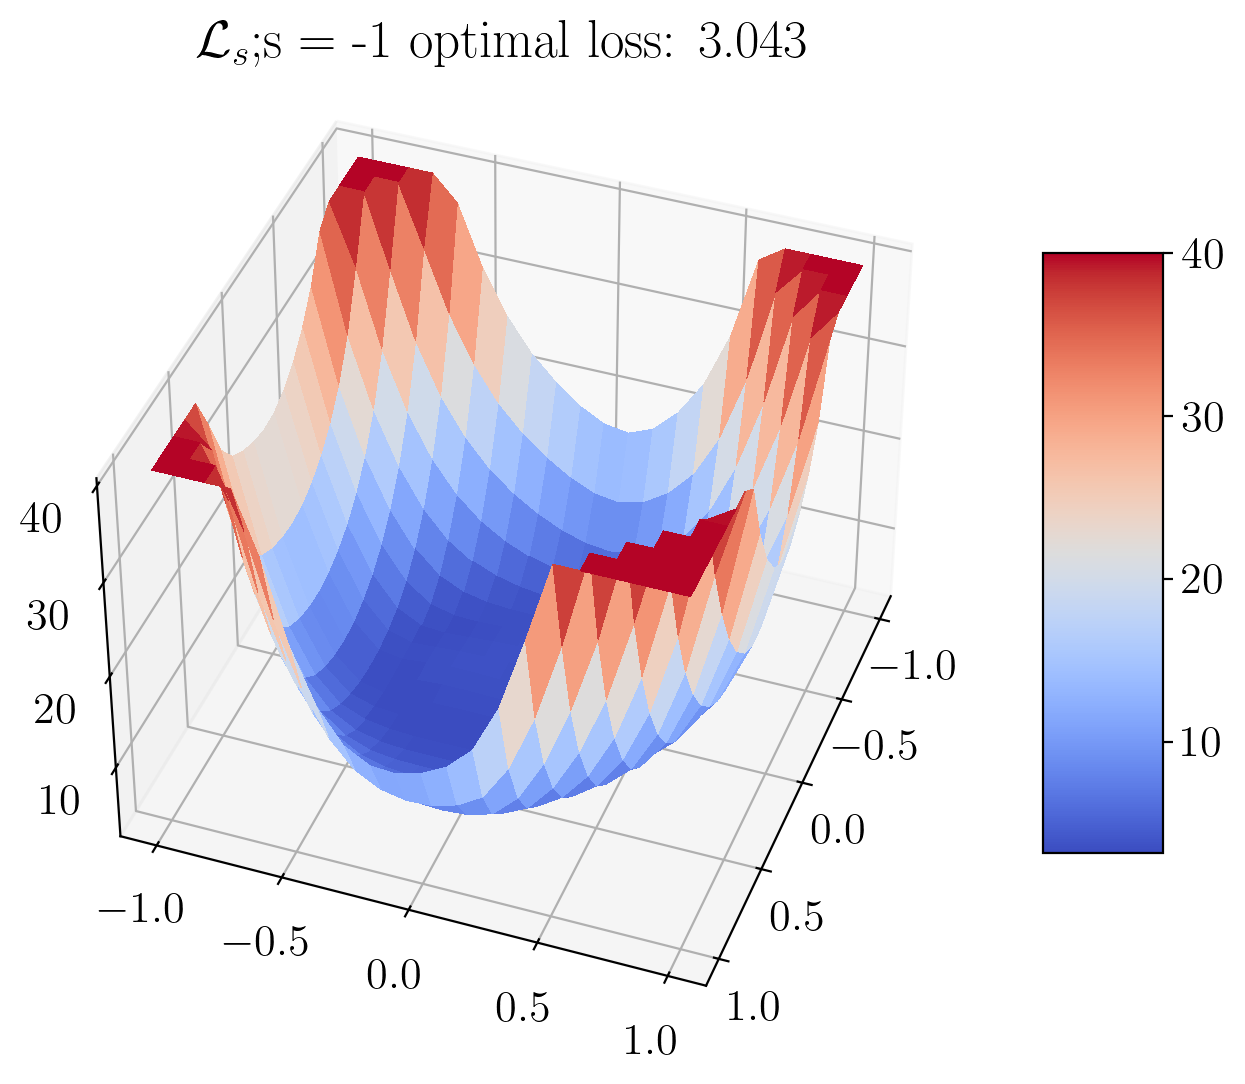

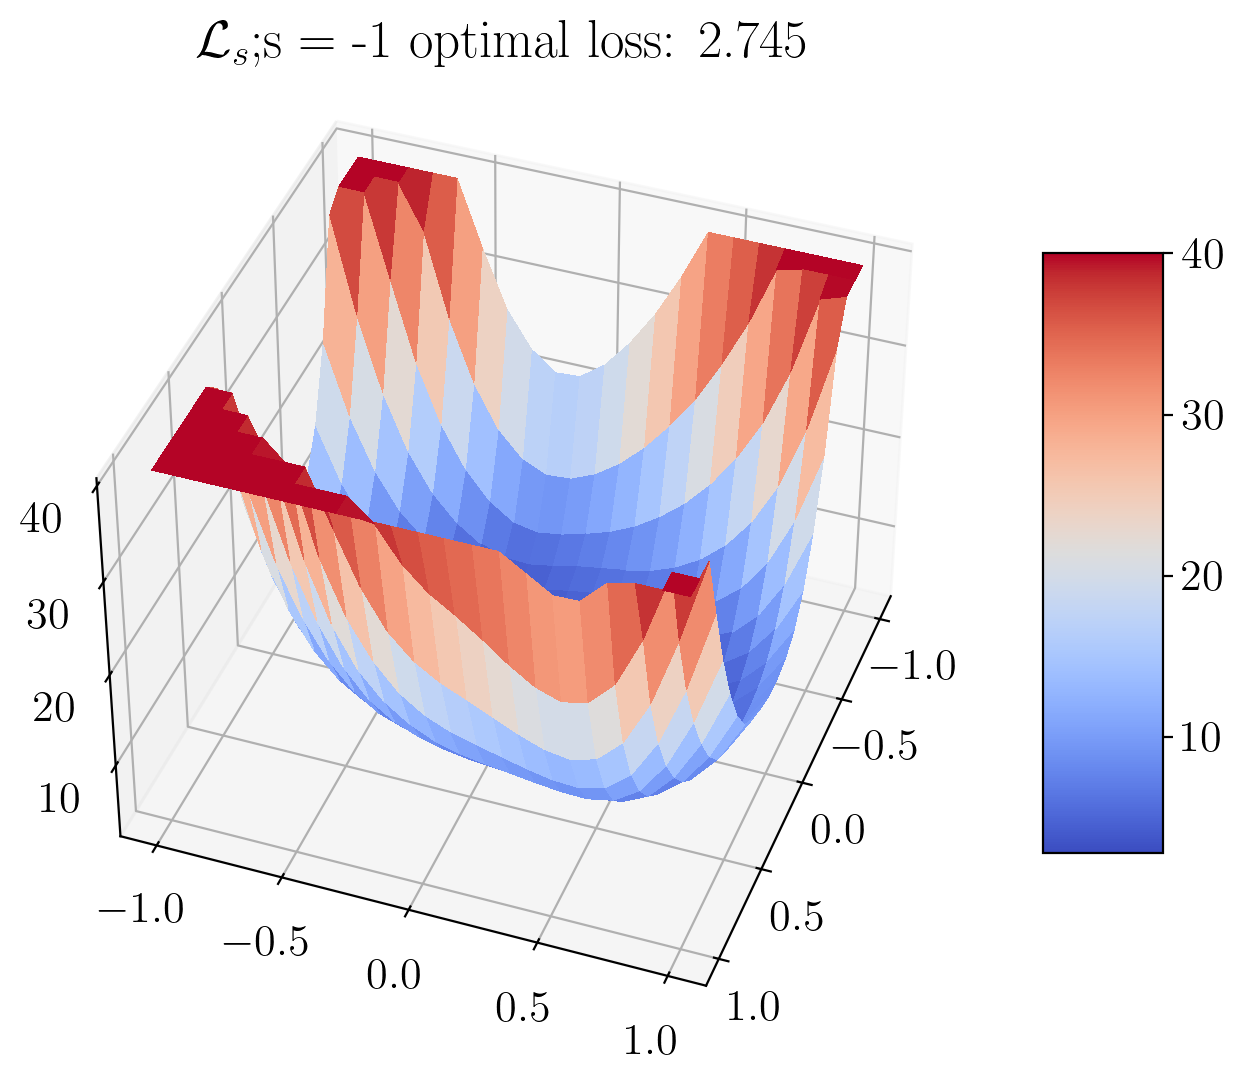

In [23]:
vis_no_bn_no_dropout.visualize(size = -1, z_grid_bounds=[-float('inf'), 40])
vis_no_dropout.visualize(size = -1, z_grid_bounds=[-float('inf'), 40])
vis.visualize(size = -1, z_grid_bounds=[-float('inf'), 40])

In [24]:
# vis_no_bn_no_dropout.visualize_diff(size1 = 8, 
#                                     size2 = -1, 
#                                     diff_type='square')
# vis_no_dropout.visualize_diff(size1 = 8, 
#                               size2 = -1, 
#                               diff_type='square')
# vis.visualize_diff(size1 = 8, 
#                    size2 = -1, 
#                    diff_type='square')

In [25]:
# vis_no_bn_no_dropout.visualize_diff(size1 = 8, size2 = -1, diff_type='relative_square')
# vis_no_dropout.visualize_diff(size1 = 8, size2 = -1, diff_type='relative_square')
# vis.visualize_diff(size1 = 8, size2 = -1, diff_type='relative_square')

best_epoch: 2
best valid accuracy: 0.5225360576923077
best valid loss: 1.3868252100088658
best_epoch: 2
best valid accuracy: 0.5518830128205128
best valid loss: 1.3155616418673441
best_epoch: 3
best valid accuracy: 0.5495793269230769
best valid loss: 1.306152154237796


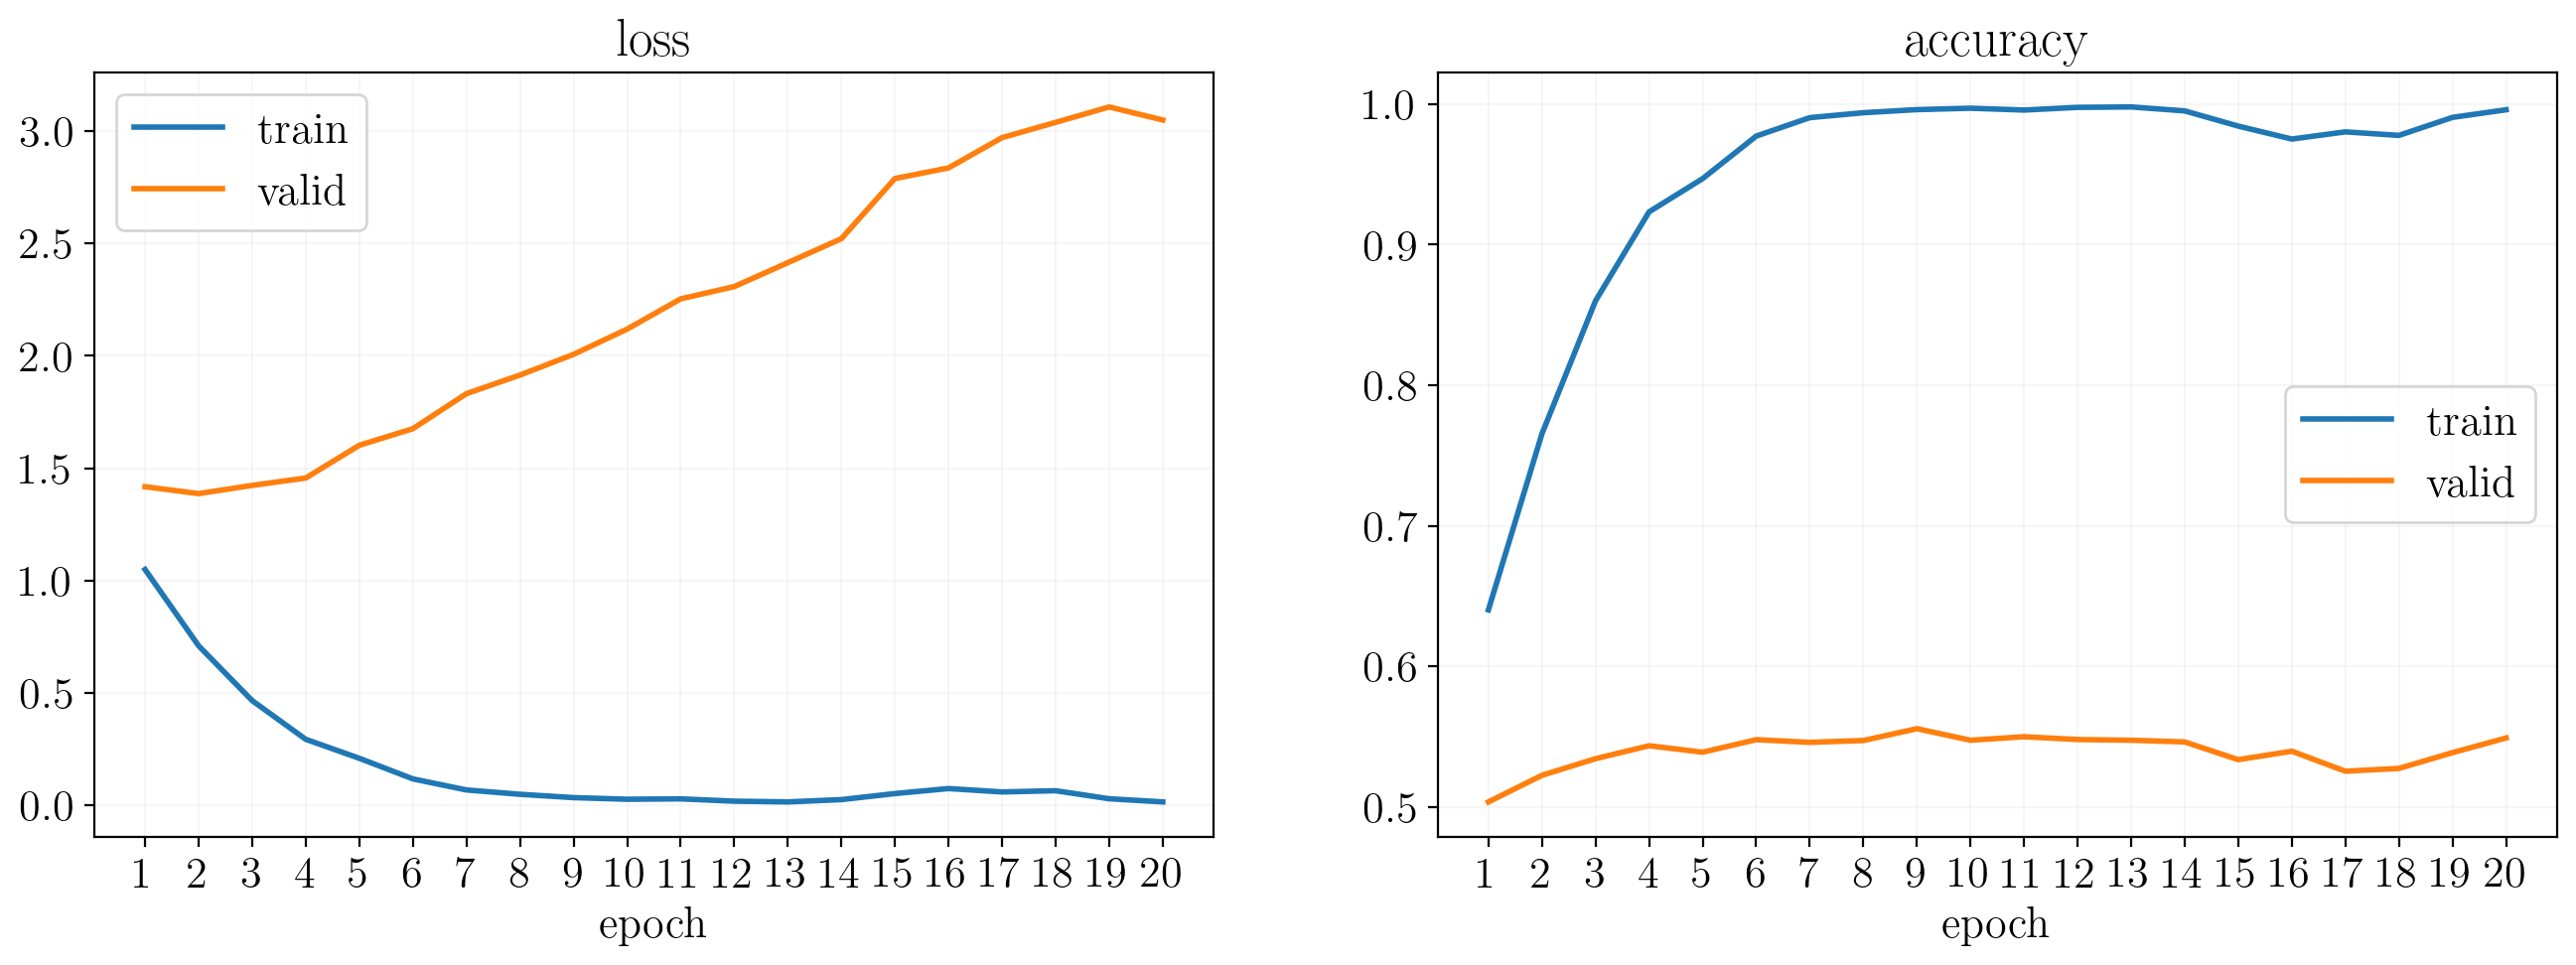

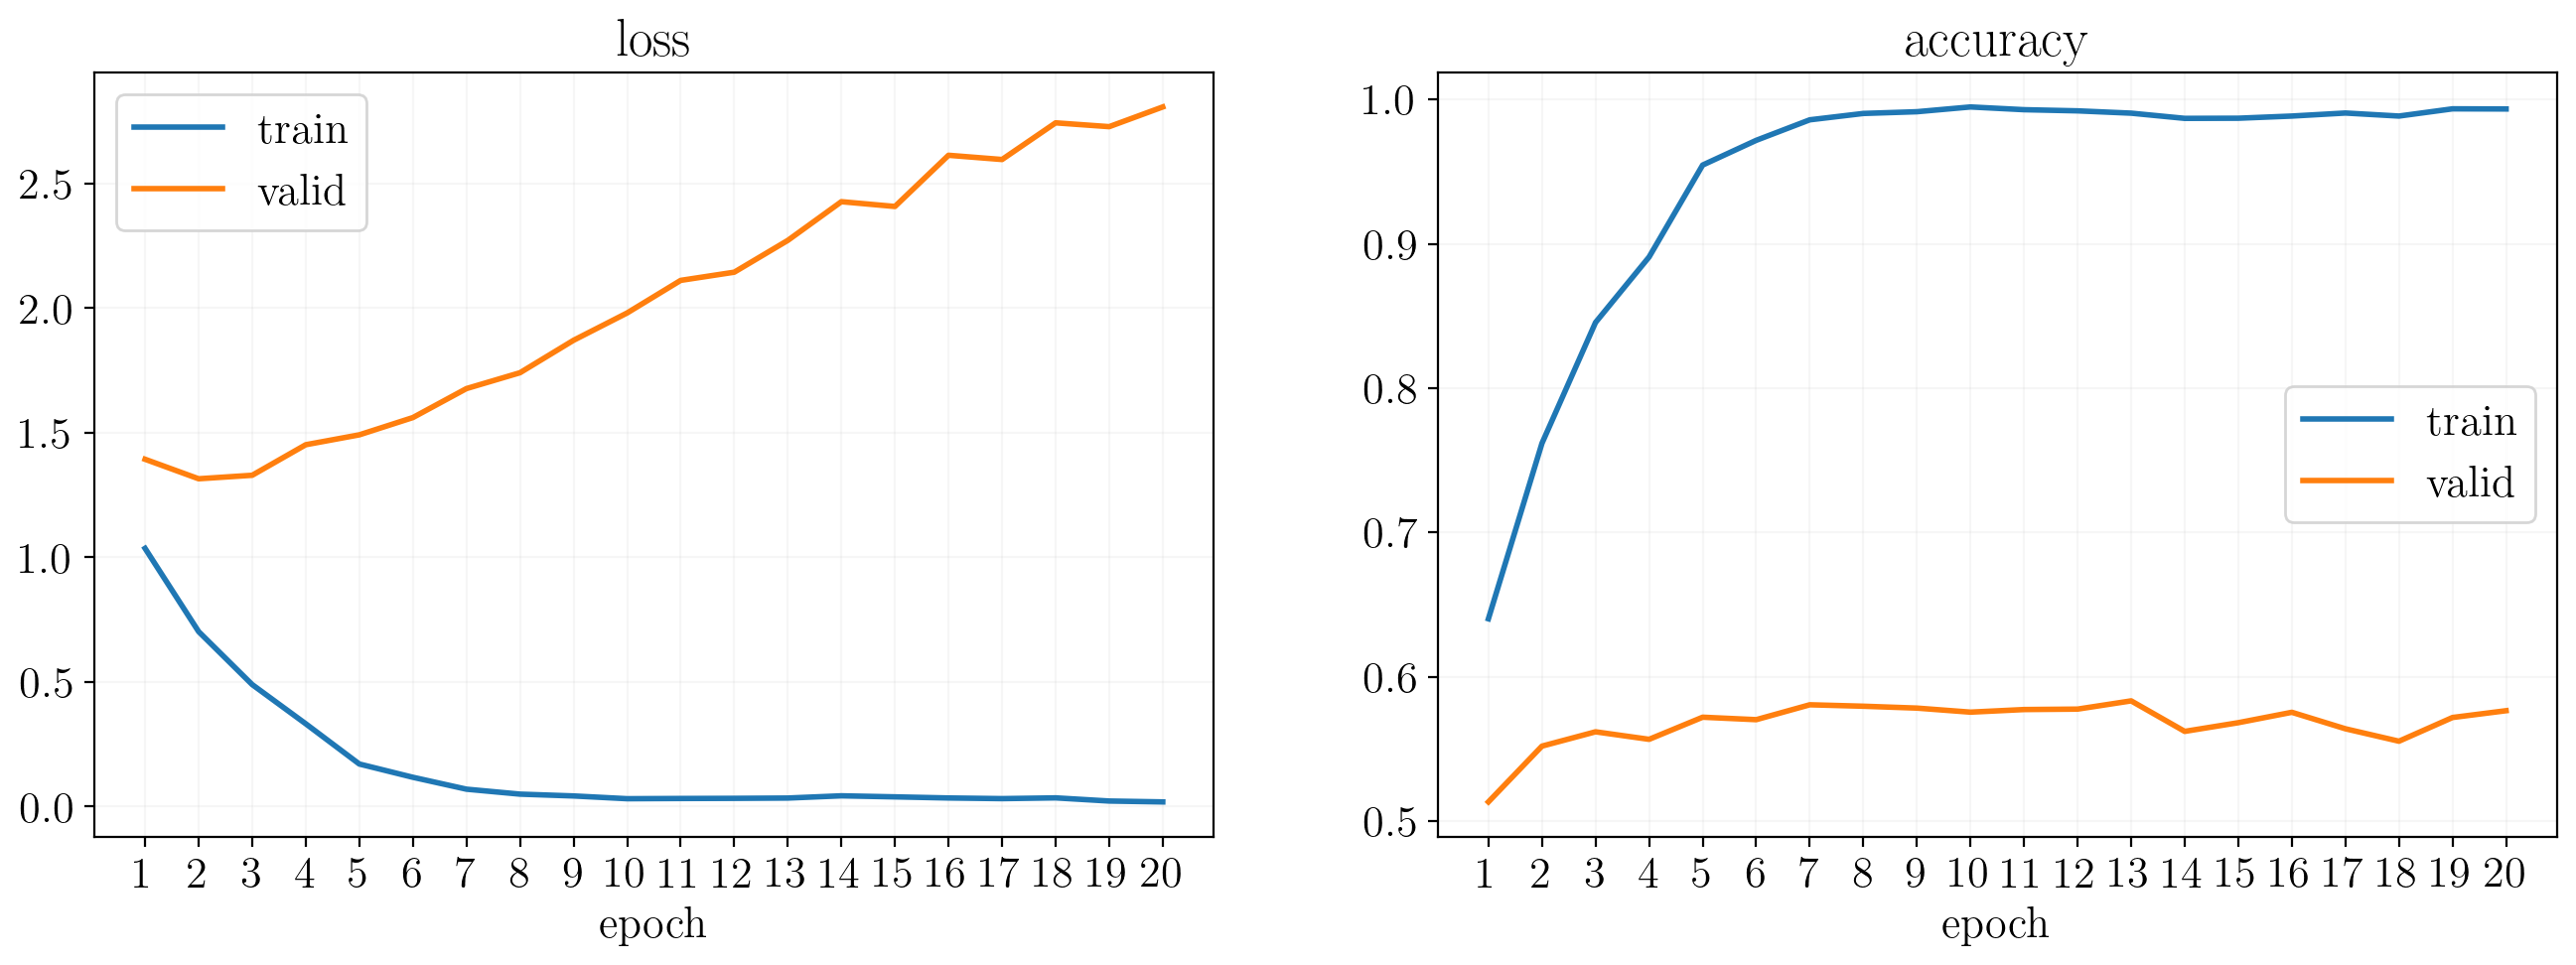

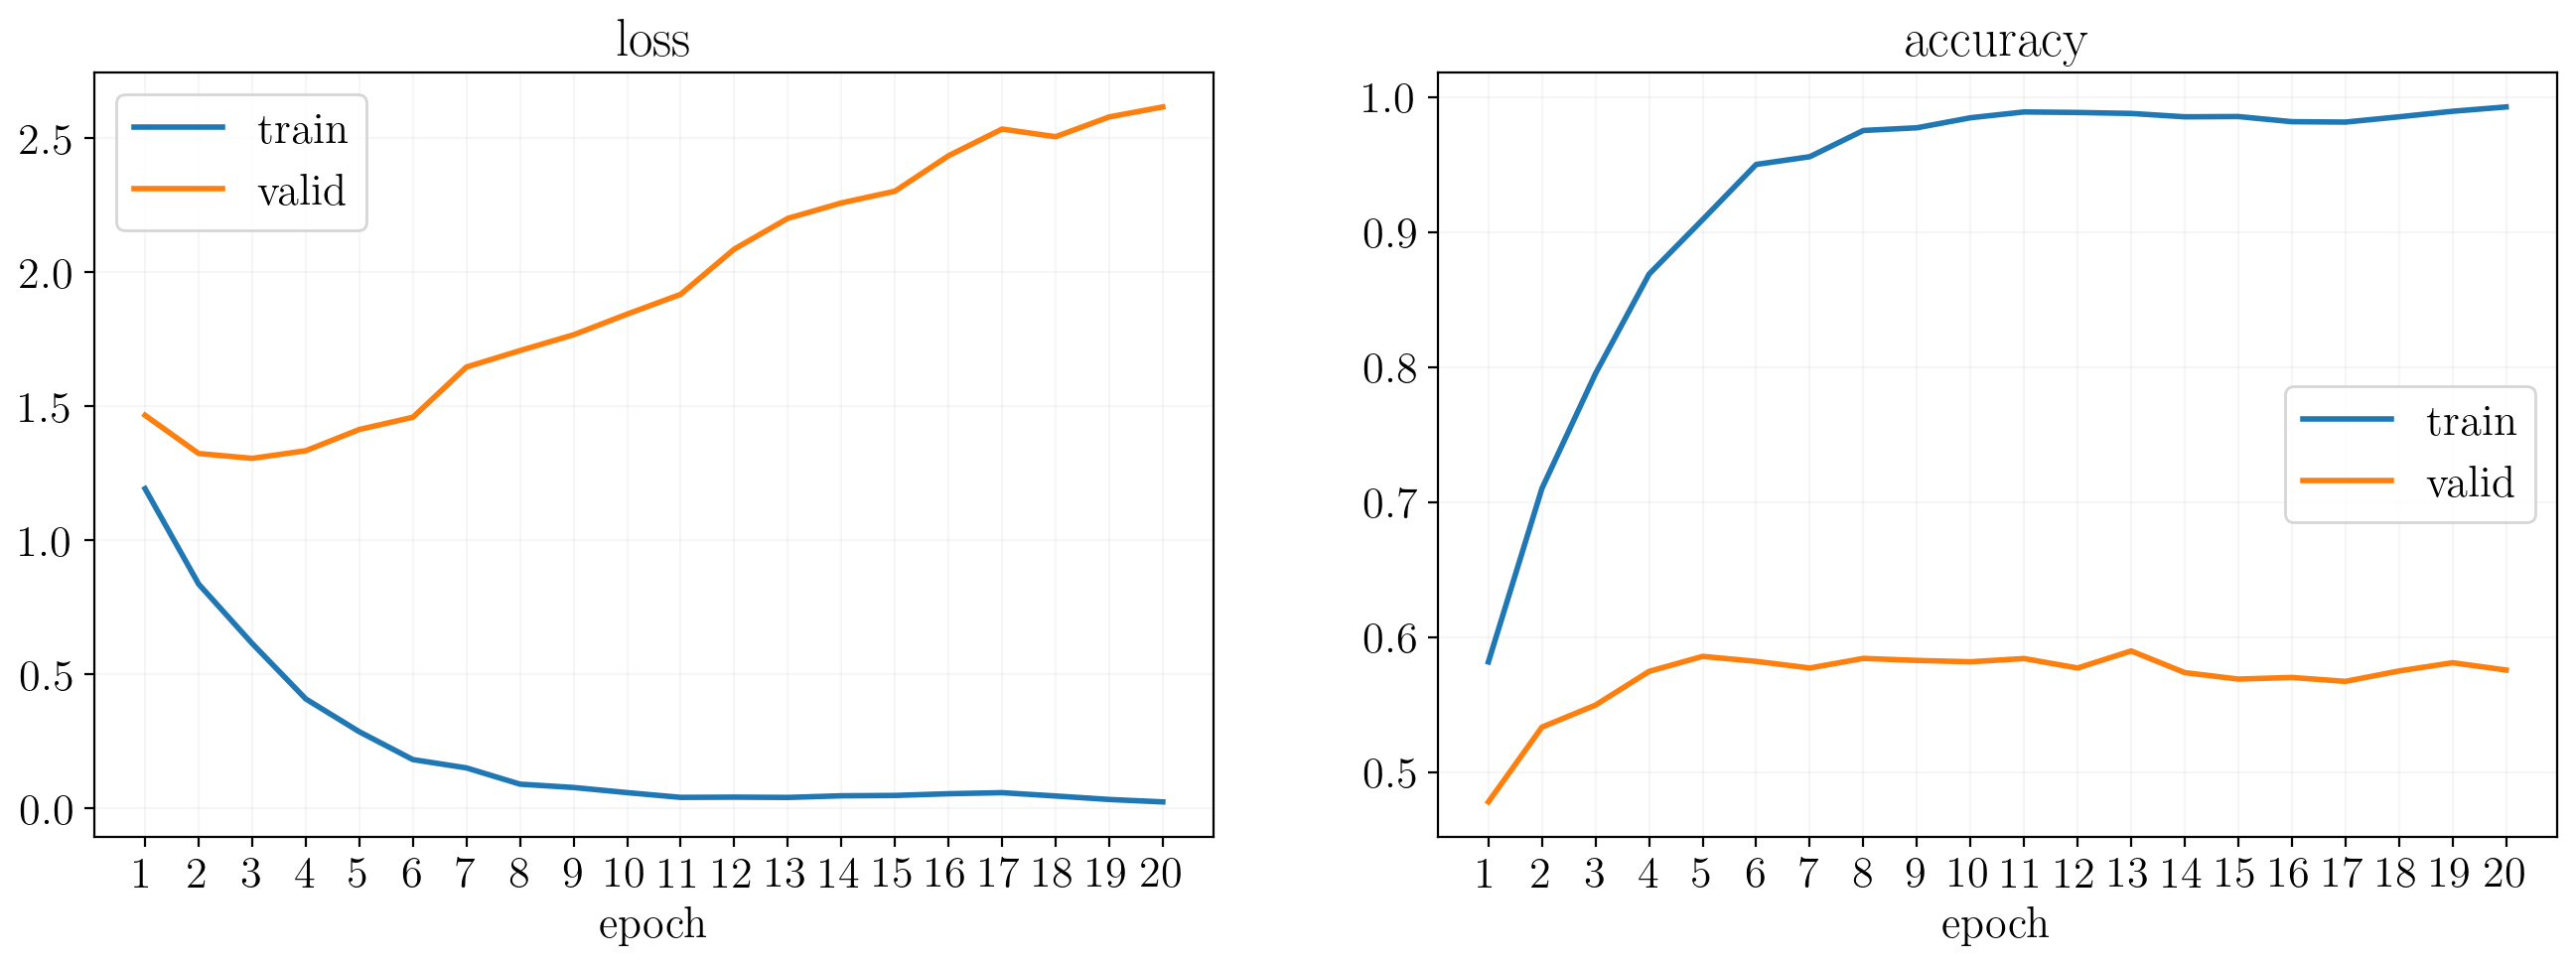

In [84]:
visualizers = []
for layers_num in [2, 4, 6]:
    model = ConvNet(
        layers_num=layers_num,
        hidden_channels=64,
        kernel_size=3,
        padding=1,
        input_channels=3,
        output_channels=32,
        input_sizes=(32, 32),
        classes=10,
        norm_class = nn.BatchNorm2d,
        dropout_p=0.1
    ).to(DEVICE)

    optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
    criterion = nn.CrossEntropyLoss()

    model, train_metrics, valid_metrics = train_and_log(
        model,
        optimizer,
        criterion,
        train_loader,
        valid_loader,
        num_epochs = 20,
        device=DEVICE
    )
    visualize_train_process(train_metrics, valid_metrics)
    show_best(train_metrics, valid_metrics, target_metric = 'loss', minimize_metric = True)
        
    # model, losses = train(
    #     model,
    #     optimizer,
    #     criterion,
    #     loader,
    #     20,
    #     DEVICE
    # )
    # losses_func = create_losses_func(loader, criterion)
    # vis = LossVisualizer(visual_type='random_2', grid_step=0.1, direction_norm=16)
    # vis.initialize_grid_loss(model, losses_func)
    # visualizers.append(vis)

In [85]:
visualizers = []
for layers_num in [2, 4, 6]:
    model = ConvNet(
        layers_num=layers_num,
        hidden_channels=64,
        kernel_size=3,
        padding=1,
        input_channels=3,
        output_channels=32,
        input_sizes=(32, 32),
        classes=10,
        norm_class = nn.BatchNorm2d,
        dropout_p=0.1
    ).to(DEVICE)

    optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
    criterion = nn.CrossEntropyLoss()

    model, losses = train(
        model,
        optimizer,
        criterion,
        loader,
        3,
        DEVICE
    )
    losses_func = create_losses_func(loader, criterion)
    vis = LossVisualizer(visual_type='random_2', grid_step=0.1, direction_norm=16)
    vis.initialize_grid_loss(model, losses_func)
    visualizers.append(vis)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

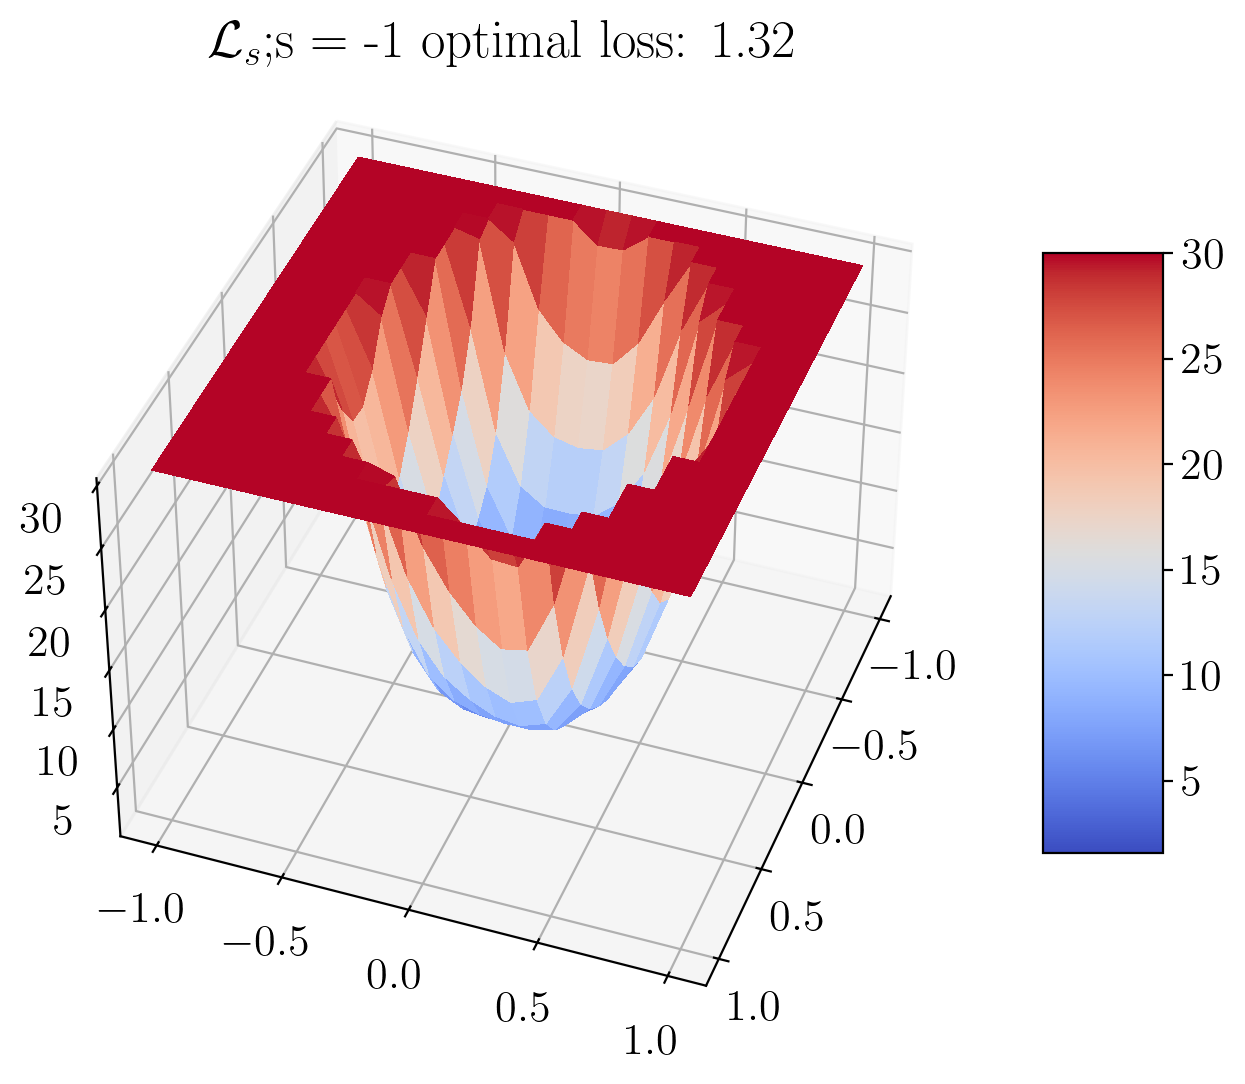

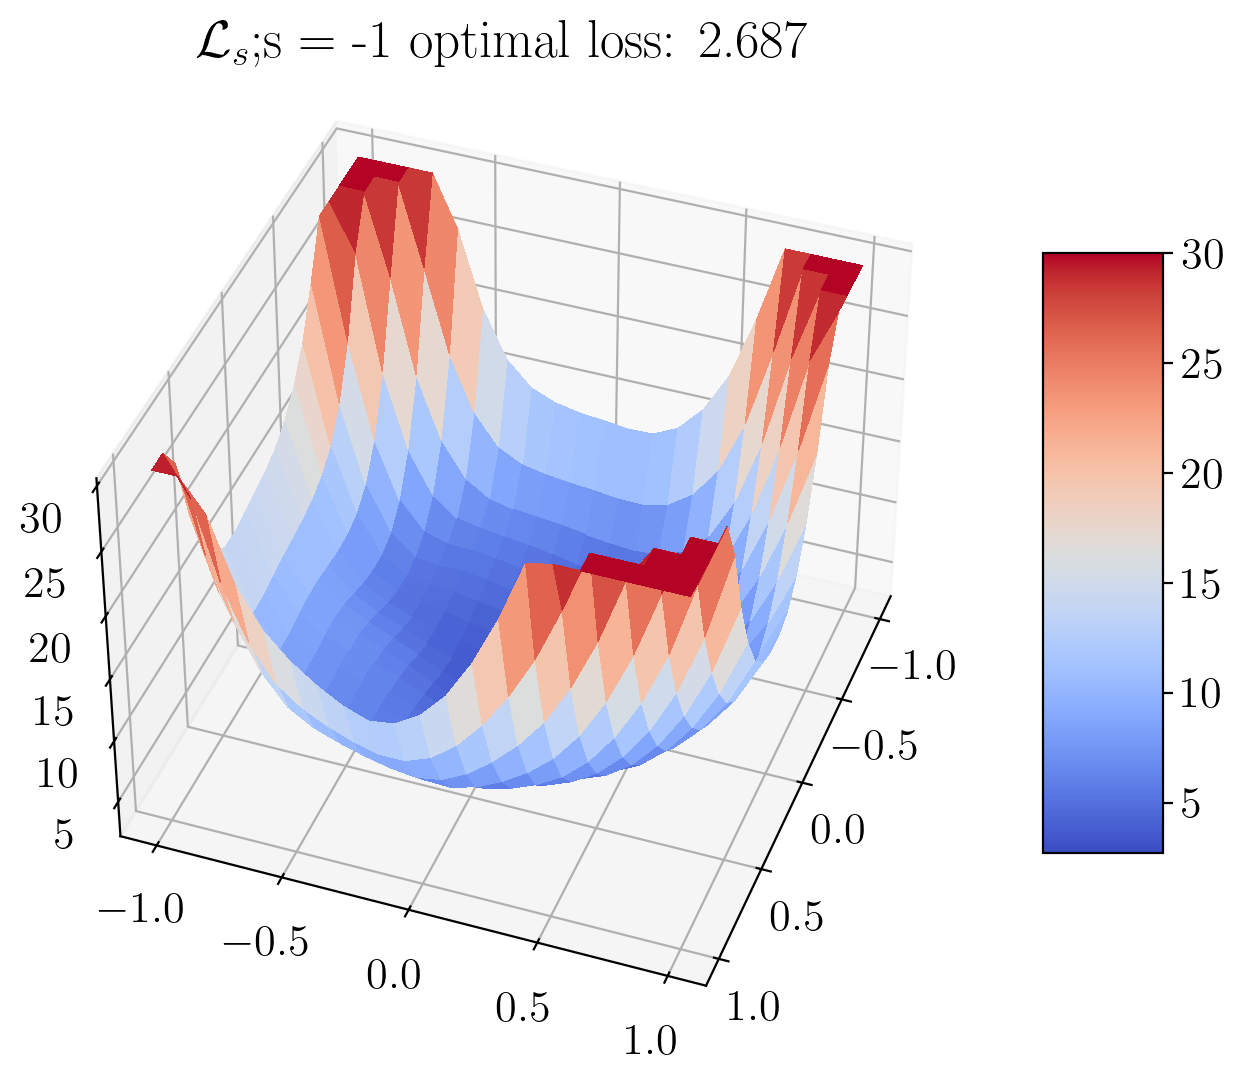

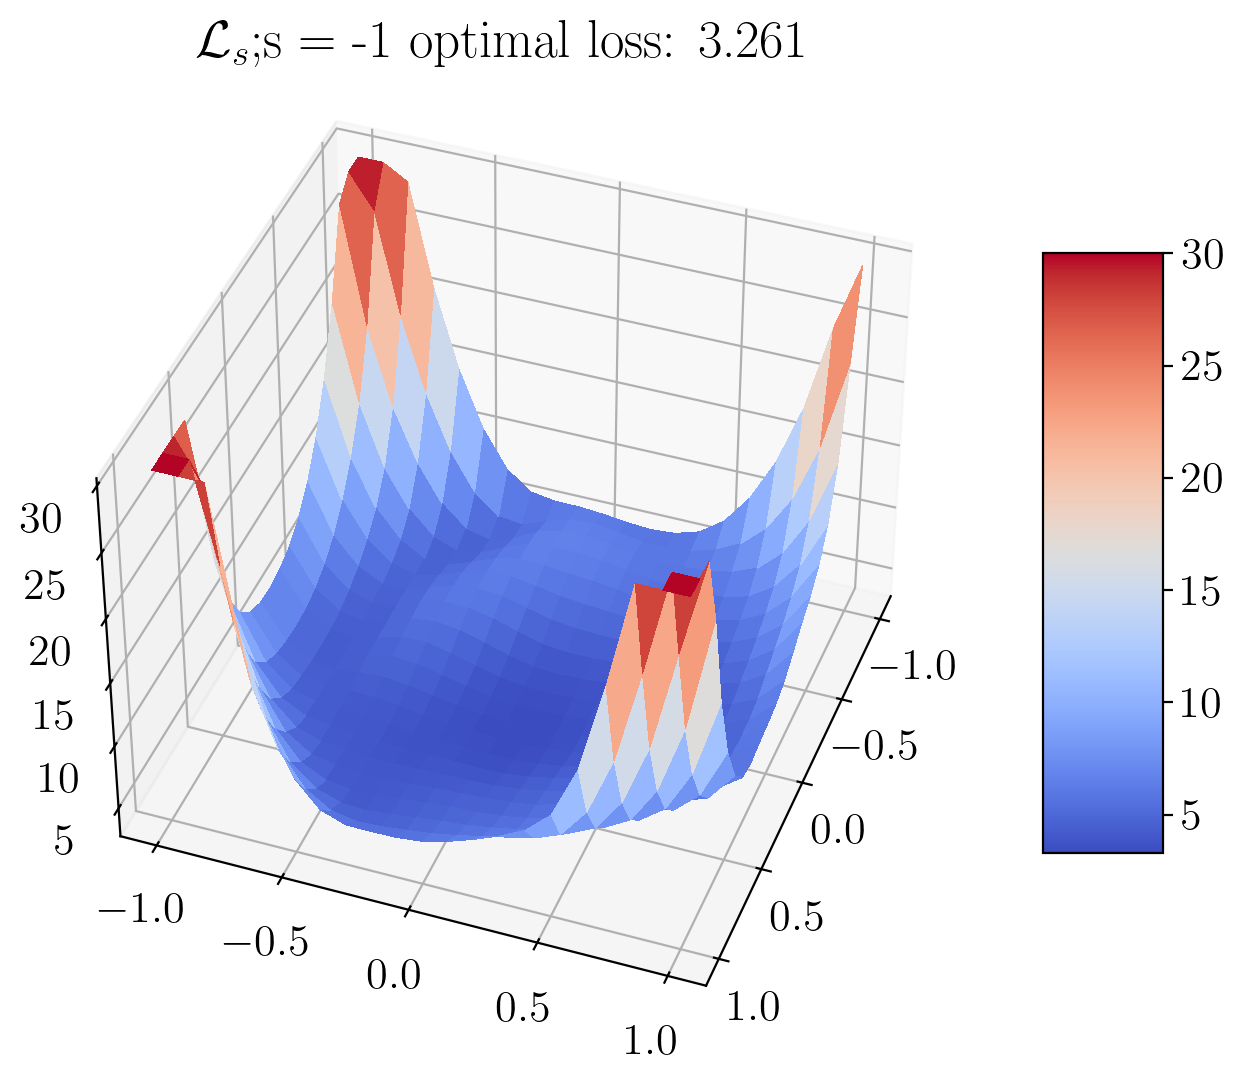

In [86]:
for vis in visualizers:
    vis.visualize(size = -1, z_grid_bounds=[-float('inf'), 30])

#### Меняем hidden'ы:

In [ ]:
visualizers = []
for layers_num in [2, 4, 6]:
    model = ConvNet(
        layers_num=layers_num,
        hidden_channels=64,
        kernel_size=3,
        padding=1,
        input_channels=3,
        output_channels=32,
        input_sizes=(32, 32),
        classes=10,
        norm_class = nn.BatchNorm2d,
        dropout_p=0.1
    ).to(DEVICE)

    optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
    criterion = nn.CrossEntropyLoss()

    model, train_metrics, valid_metrics = train_and_log(
        model,
        optimizer,
        criterion,
        train_loader,
        valid_loader,
        num_epochs = 20,
        device=DEVICE
    )
    visualize_train_process(train_metrics, valid_metrics)
    show_best(train_metrics, valid_metrics, target_metric = 'loss', minimize_metric = True)
        
    # model, losses = train(
    #     model,
    #     optimizer,
    #     criterion,
    #     loader,
    #     20,
    #     DEVICE
    # )
    # losses_func = create_losses_func(loader, criterion)
    # vis = LossVisualizer(visual_type='random_2', grid_step=0.1, direction_norm=16)
    # vis.initialize_grid_loss(model, losses_func)
    # visualizers.append(vis)

best_epoch: 3
best valid accuracy: 0.5284455128205128
best valid loss: 1.370218357214561
best_epoch: 2
best valid accuracy: 0.5653044871794872
best valid loss: 1.259041504218028
best_epoch: 2
best valid accuracy: 0.5534855769230769
best valid loss: 1.3215739631499999
best_epoch: 2
best valid accuracy: 0.5454727564102564
best valid loss: 1.3360359007731462
best_epoch: 2
best valid accuracy: 0.5431690705128205
best valid loss: 1.3633792369793623


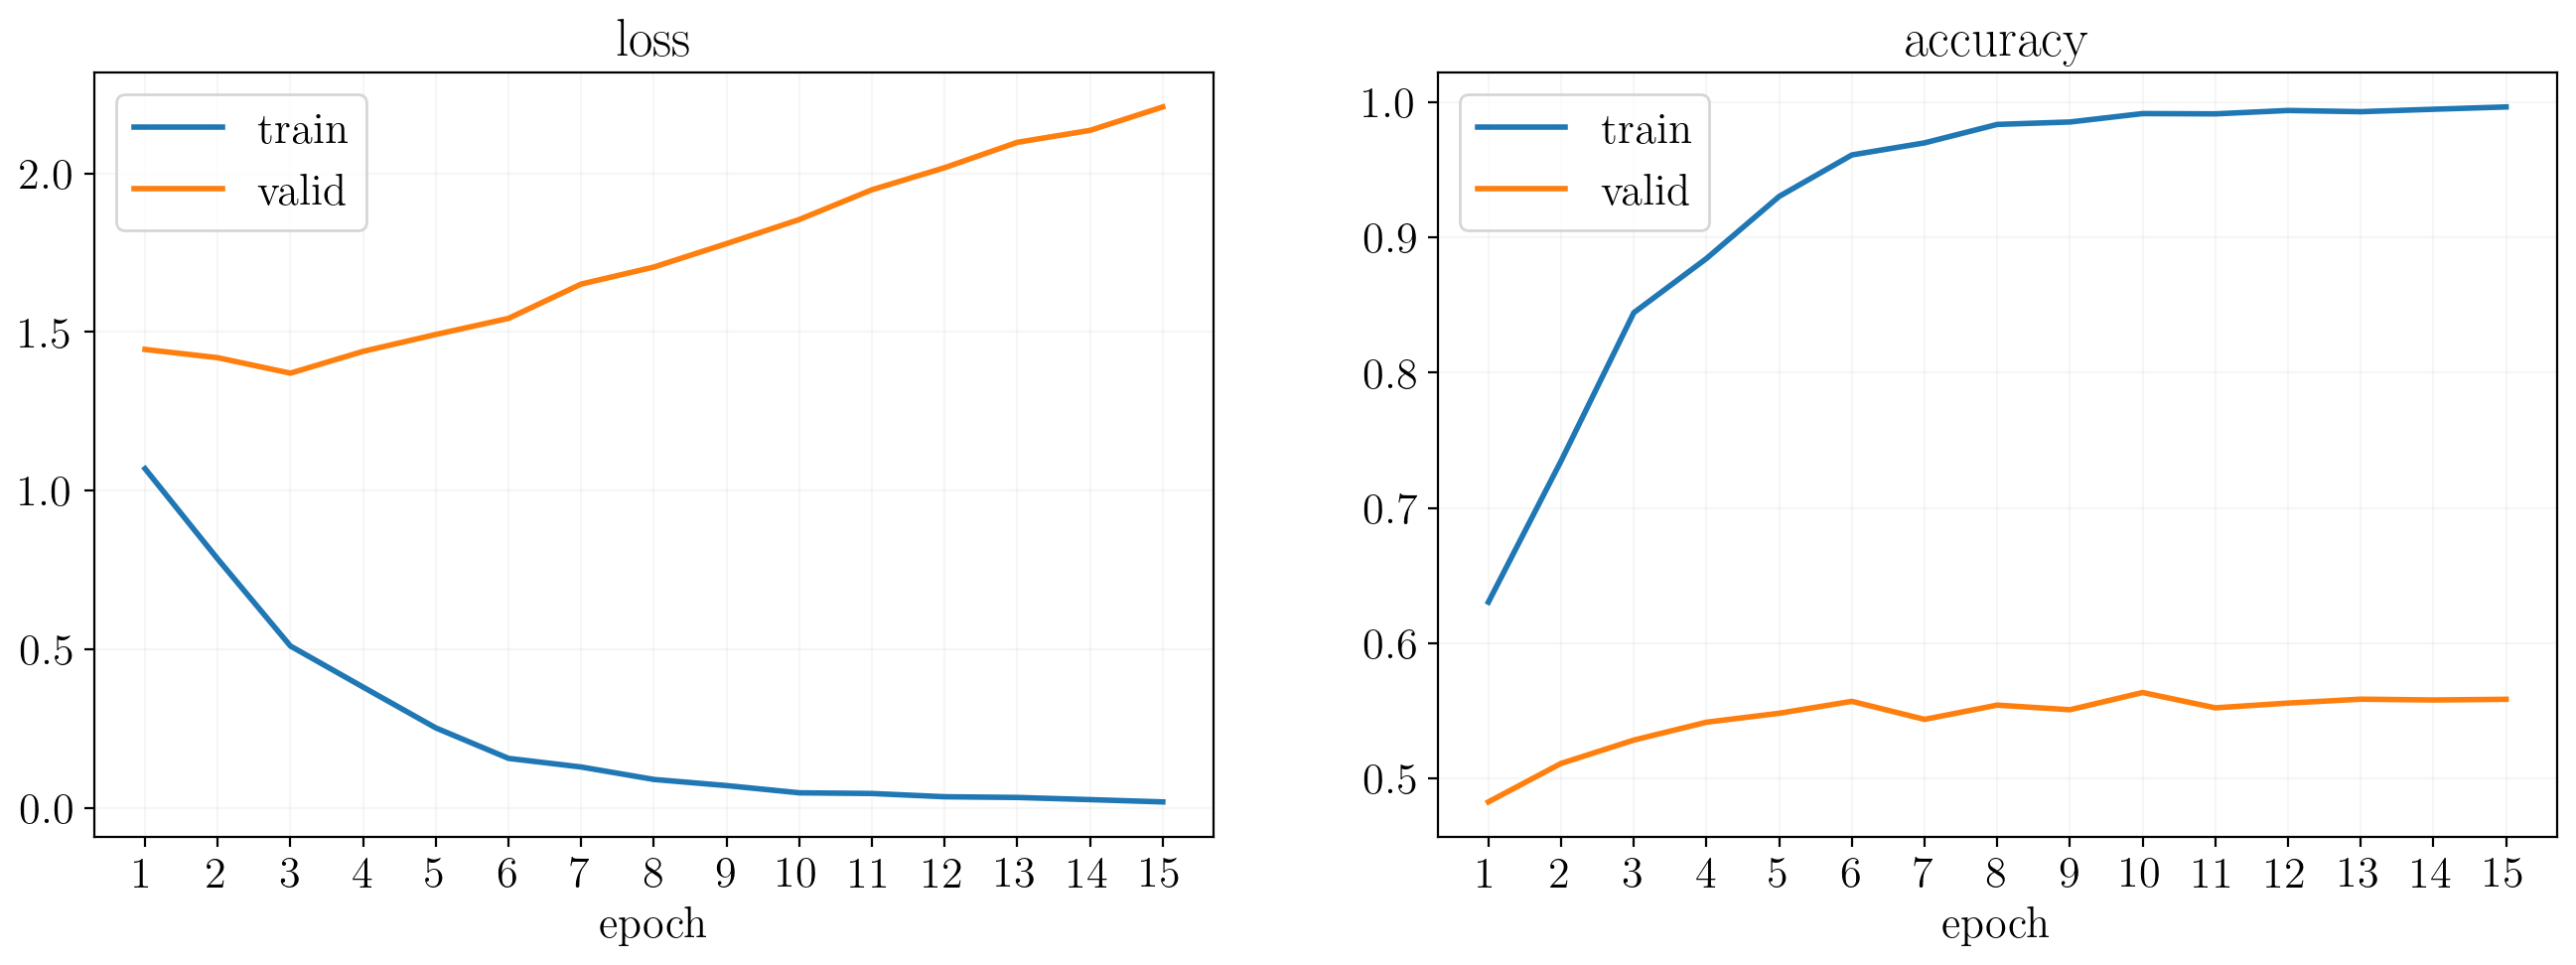

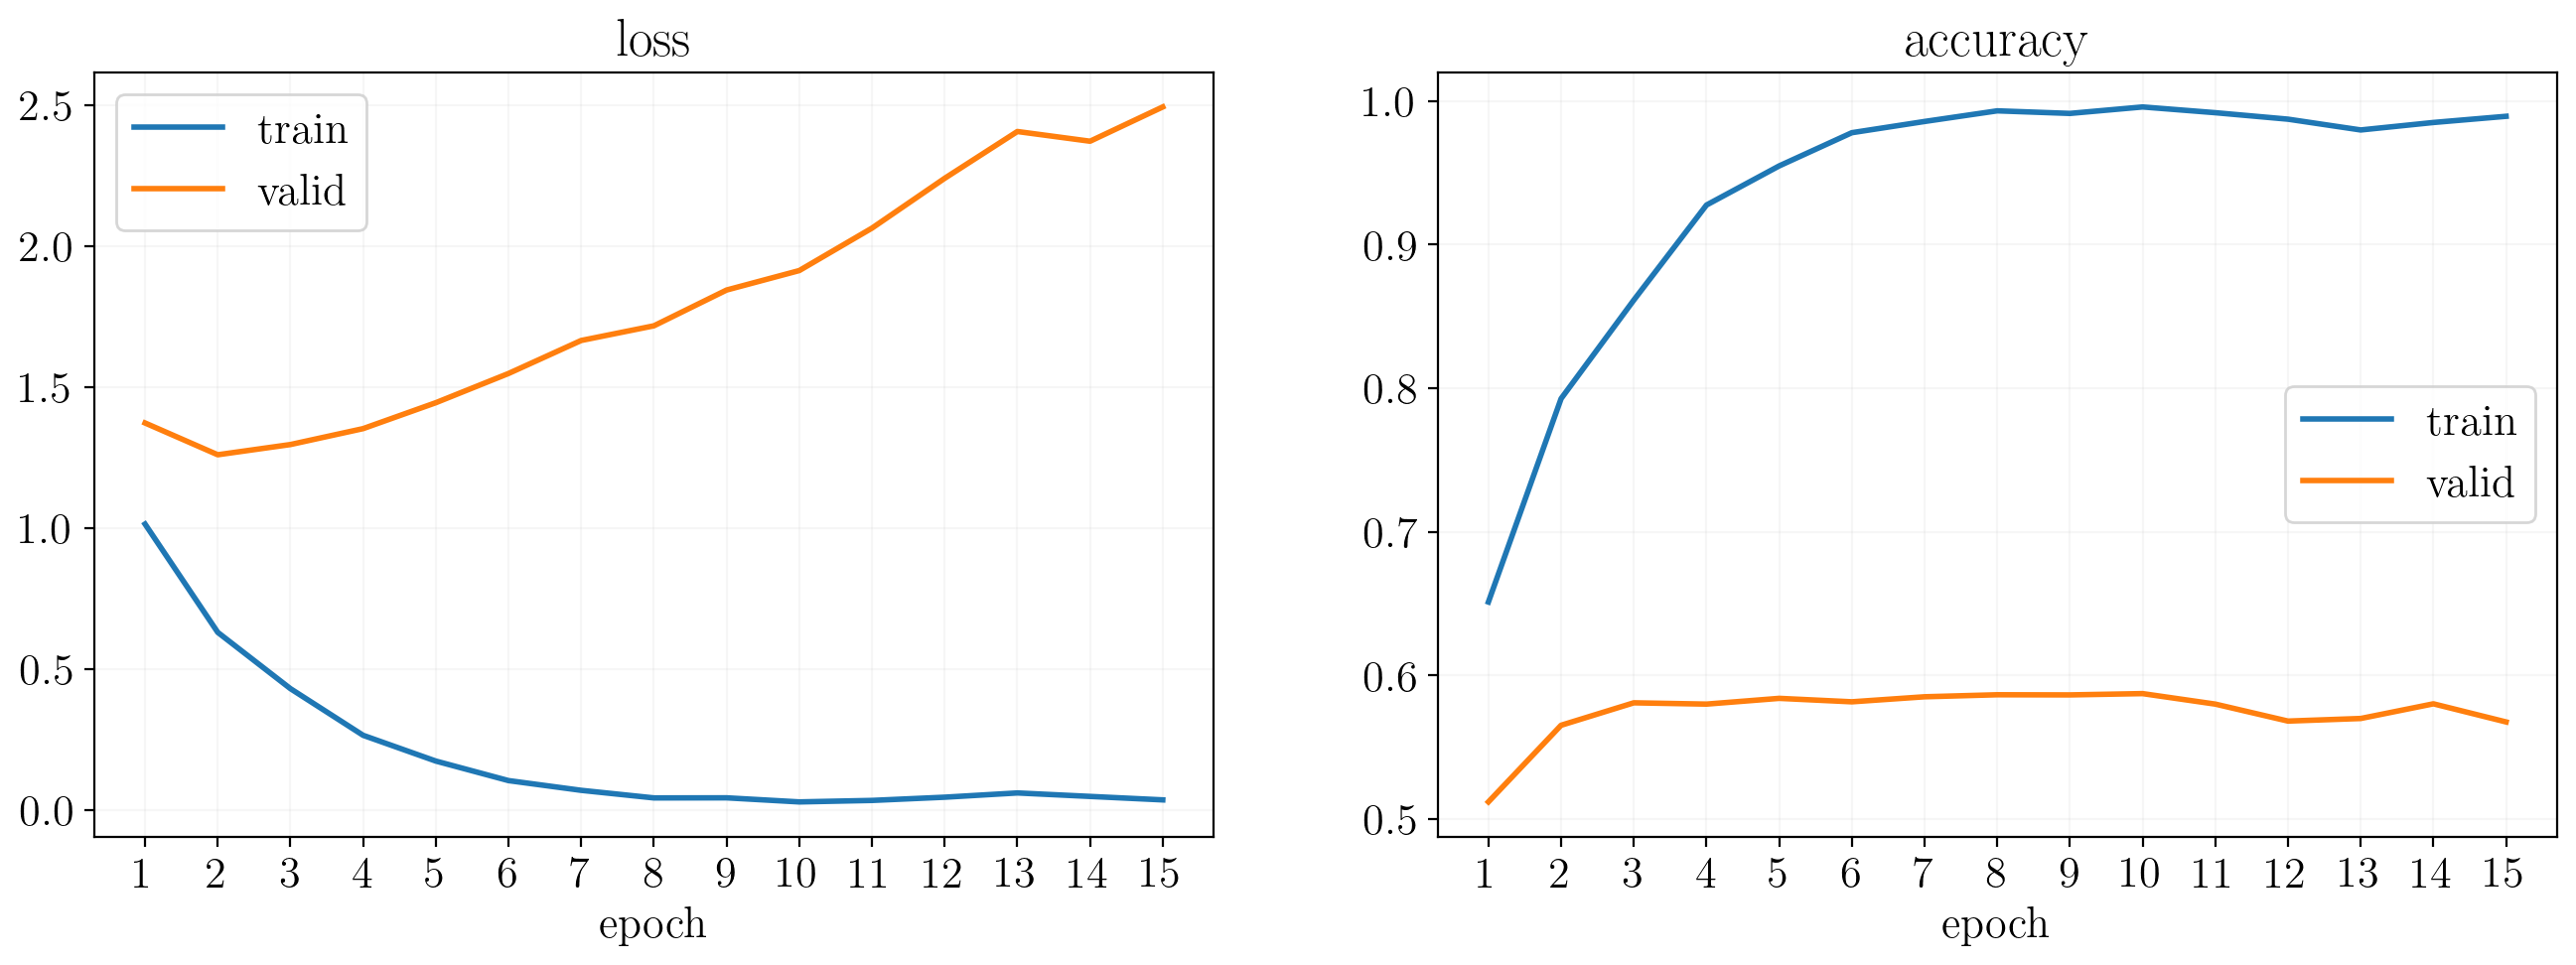

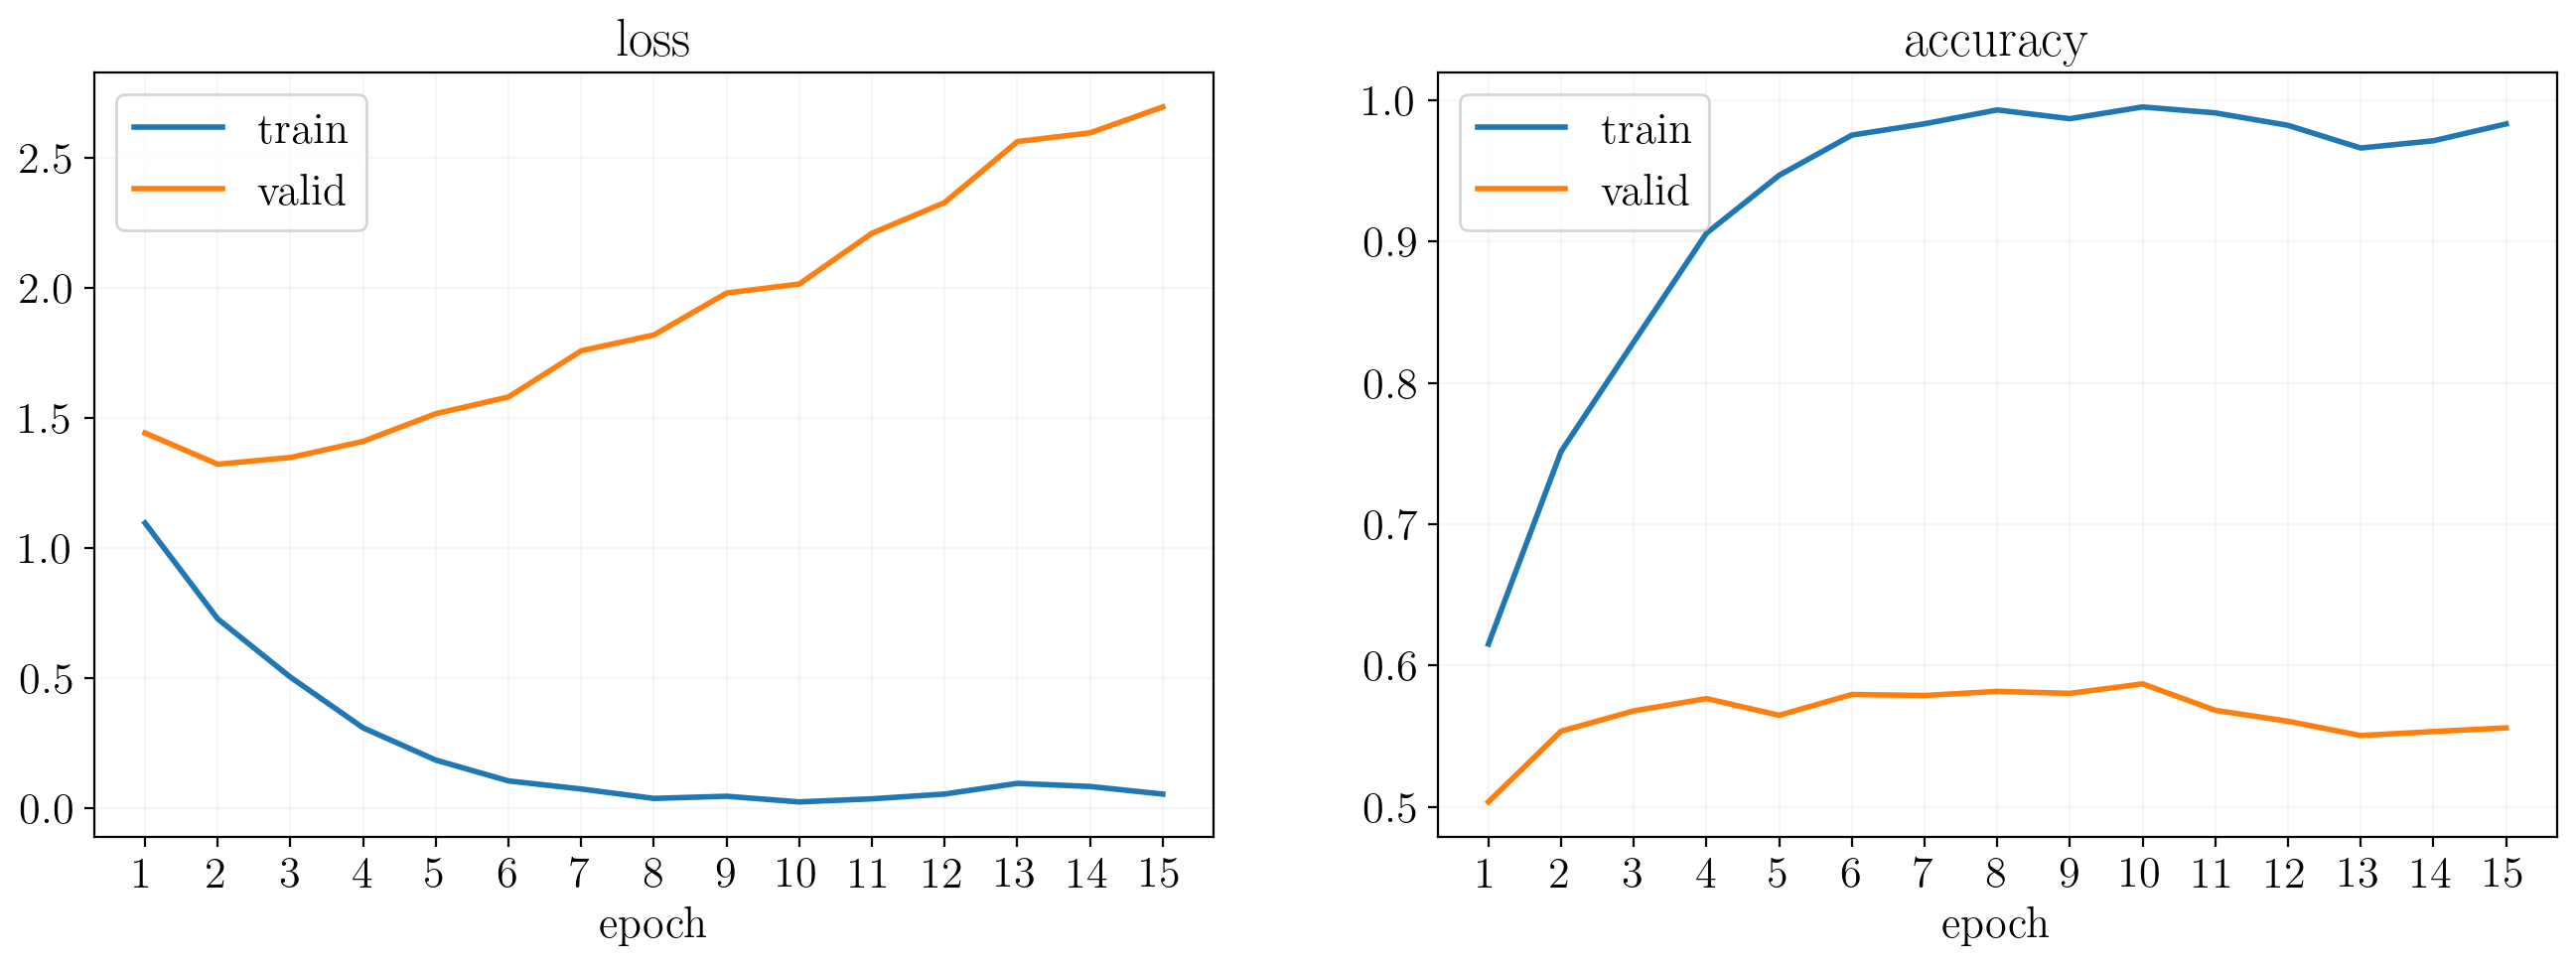

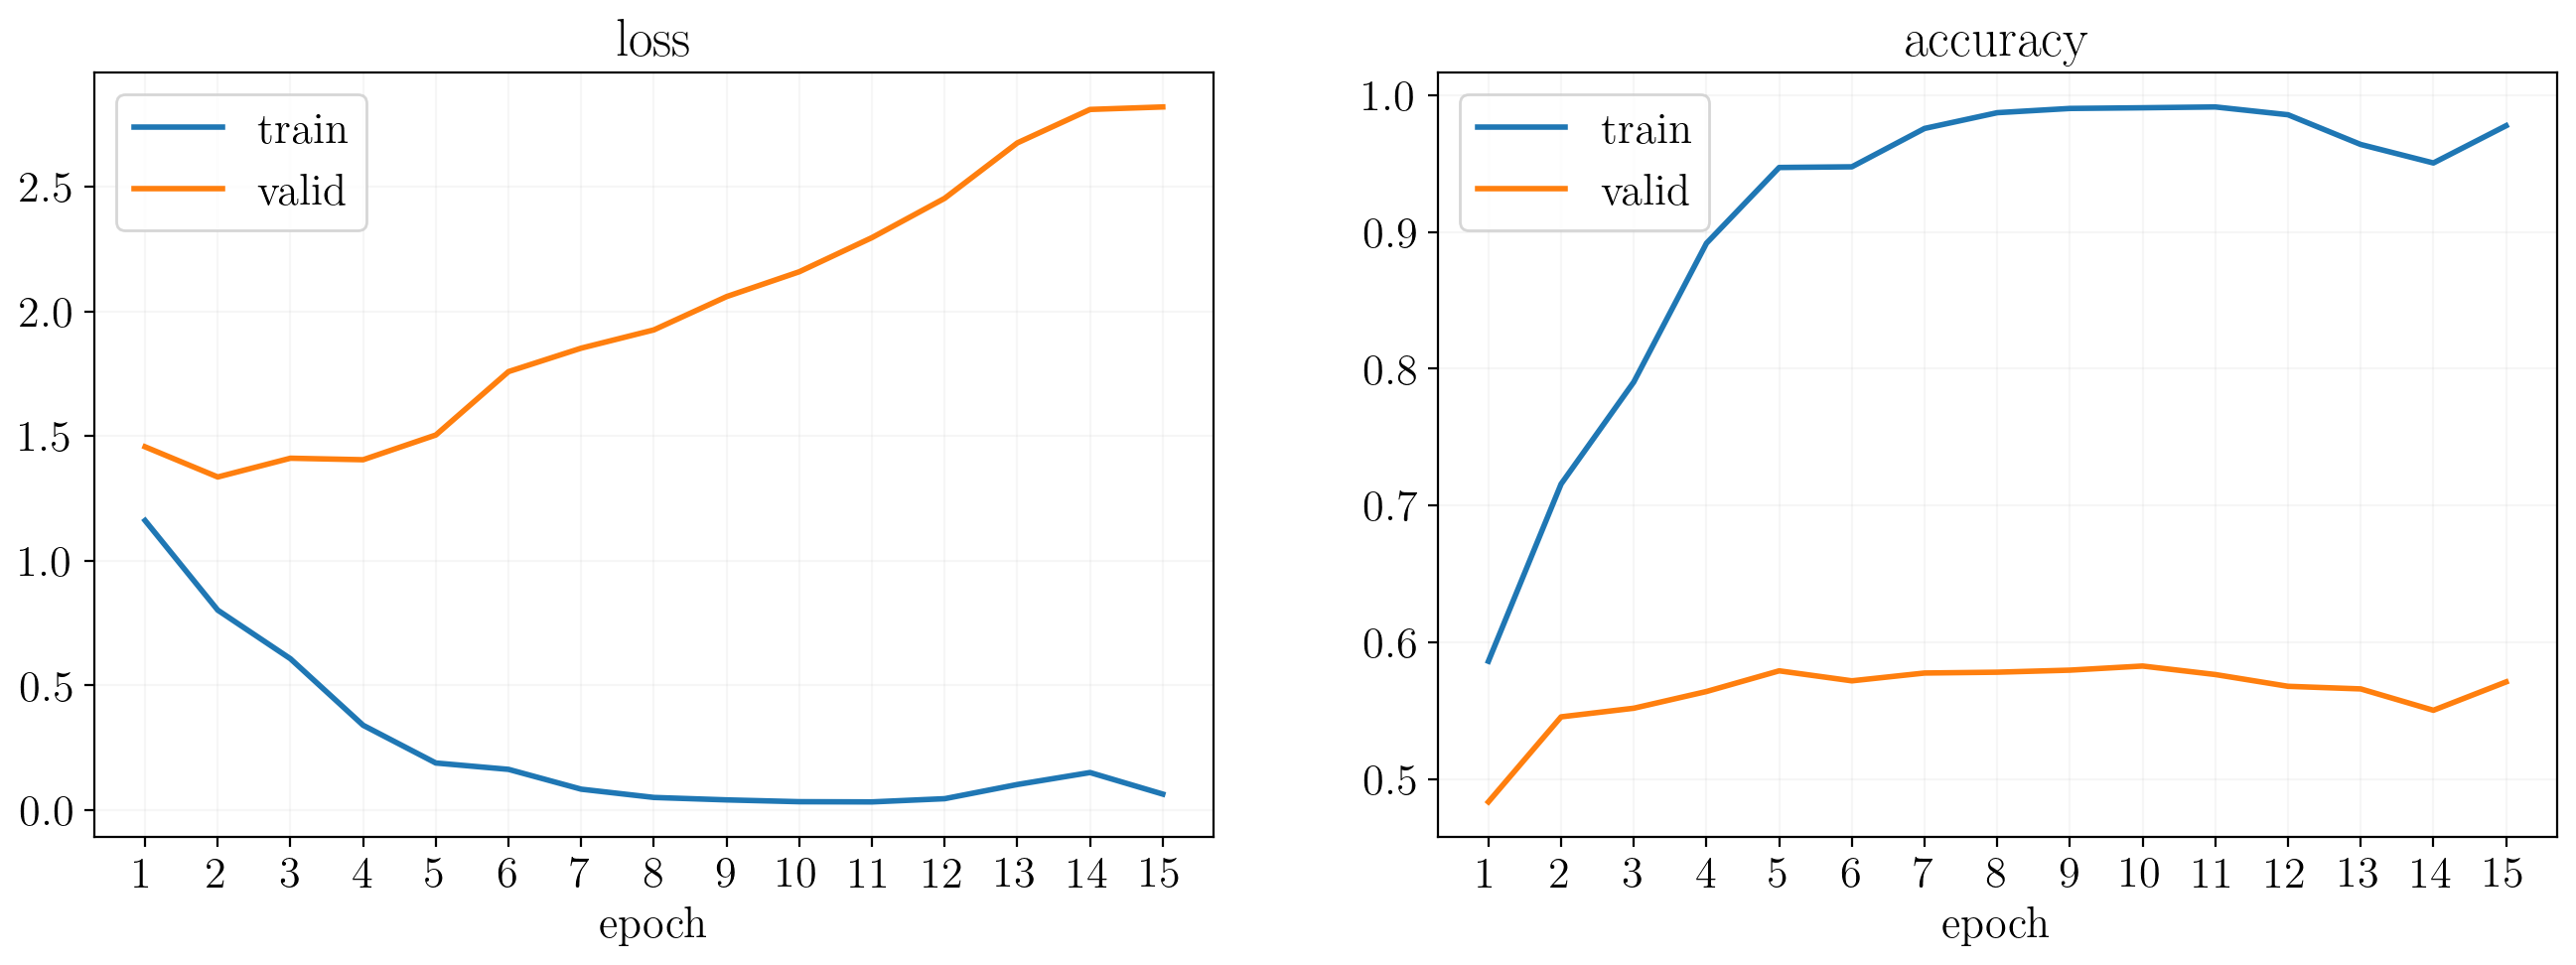

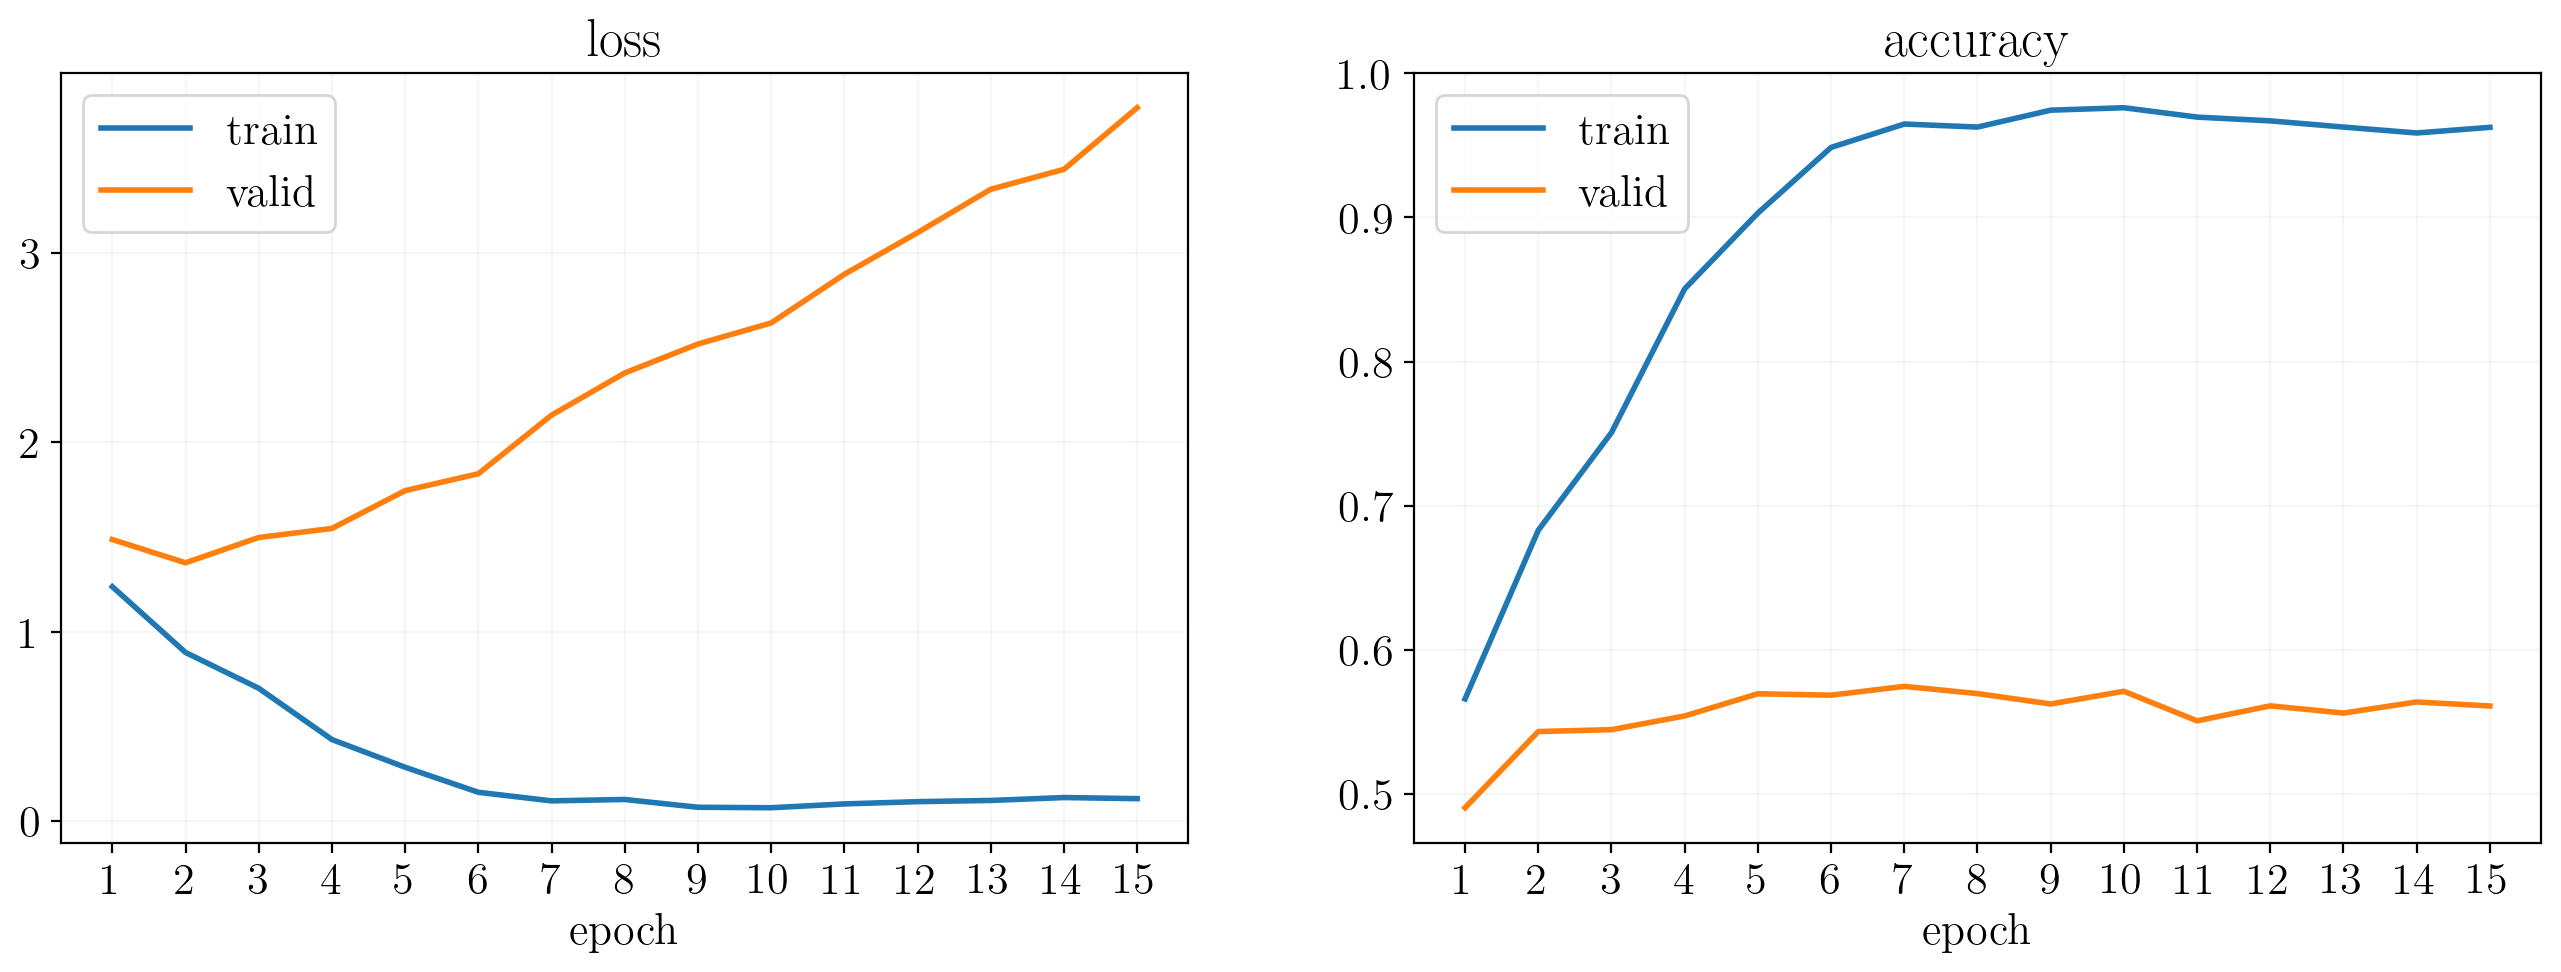

In [27]:
visualizers = []
for hidden_channels in [32, 64, 96, 128, 256]:
    model = ConvNet(
        layers_num=4,
        hidden_channels=hidden_channels,
        kernel_size=3,
        padding=1,
        input_channels=3,
        output_channels=32,
        input_sizes=(32, 32),
        classes=10,
        norm_class = nn.BatchNorm2d,
        dropout_p=0.1
    ).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
    criterion = nn.CrossEntropyLoss()

    model, train_metrics, valid_metrics = train_and_log(
        model,
        optimizer,
        criterion,
        train_loader,
        valid_loader,
        num_epochs = 15,
        device=DEVICE
    )
    visualize_train_process(train_metrics, valid_metrics)
    show_best(train_metrics, valid_metrics, target_metric = 'loss', minimize_metric = True)

In [28]:
visualizers = []
for hidden_channels in [32, 64, 96, 128, 256]:
    model = ConvNet(
        layers_num=4,
        hidden_channels=hidden_channels,
        kernel_size=3,
        padding=1,
        input_channels=3,
        output_channels=32,
        input_sizes=(32, 32),
        classes=10,
        norm_class = nn.BatchNorm2d,
        dropout_p=0.1
    ).to(DEVICE)

    optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
    criterion = nn.CrossEntropyLoss()

    model, losses = train(
        model,
        optimizer,
        criterion,
        loader,
        3,
        DEVICE
    )
    losses_func = create_losses_func(loader, criterion)
    vis = LossVisualizer(visual_type='random_2', grid_step=0.1, direction_norm=16)
    vis.initialize_grid_loss(model, losses_func)
    visualizers.append(vis)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

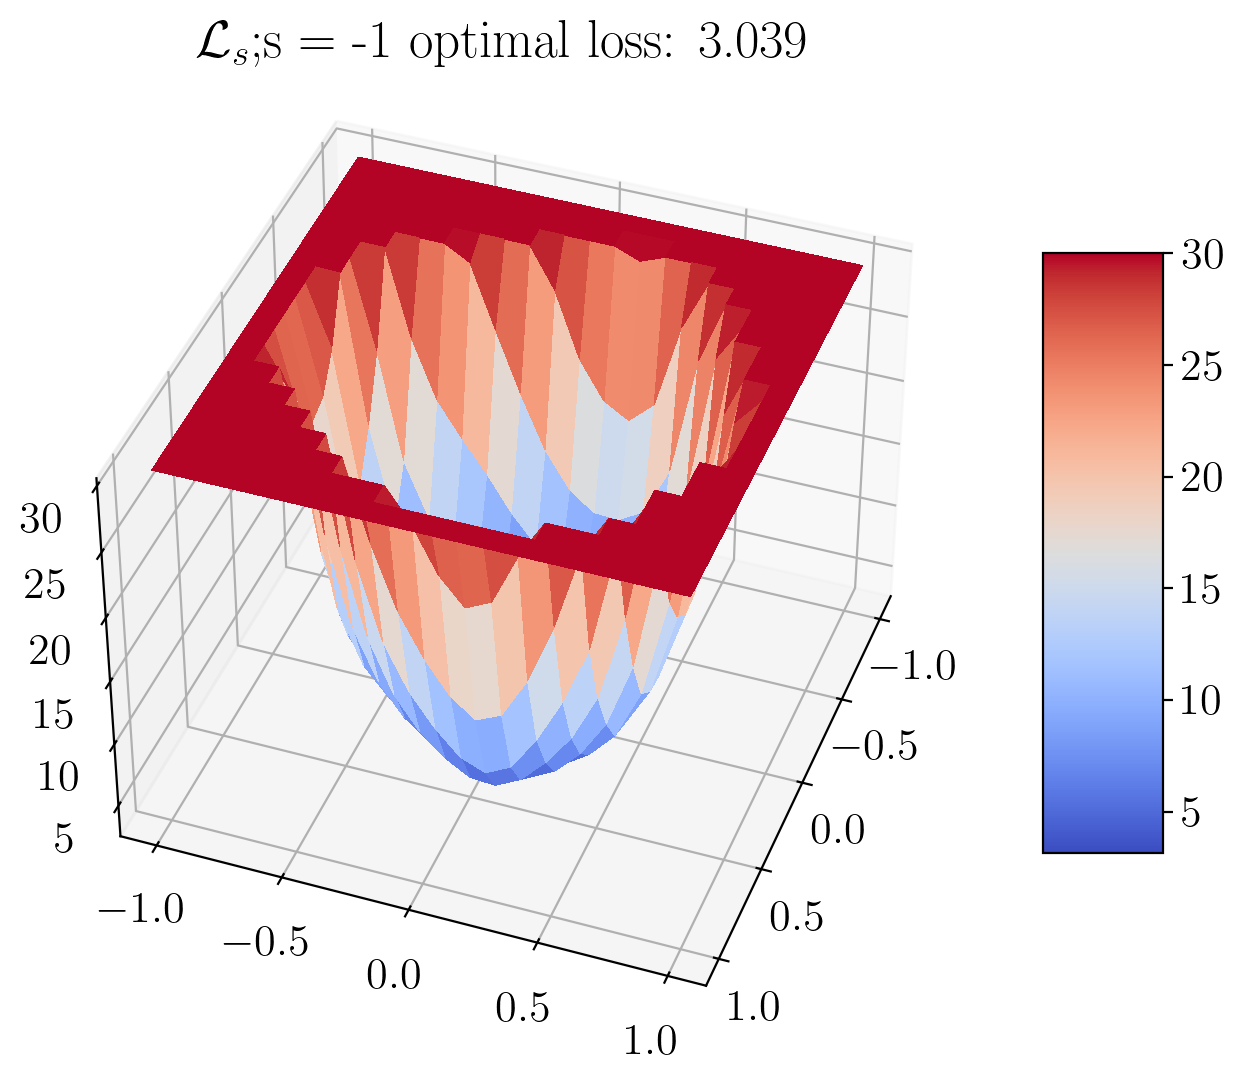

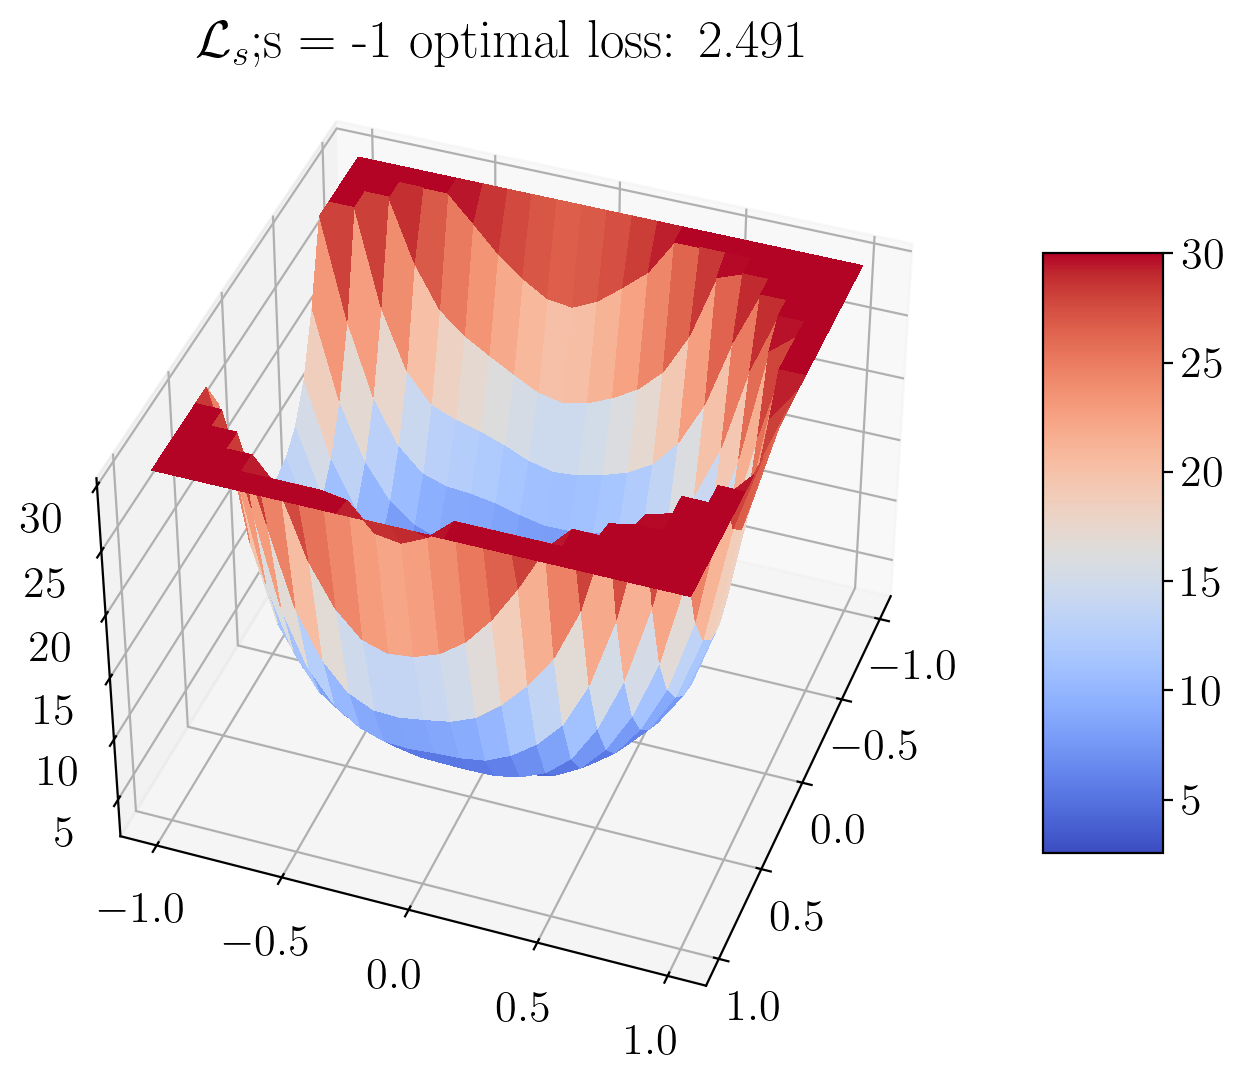

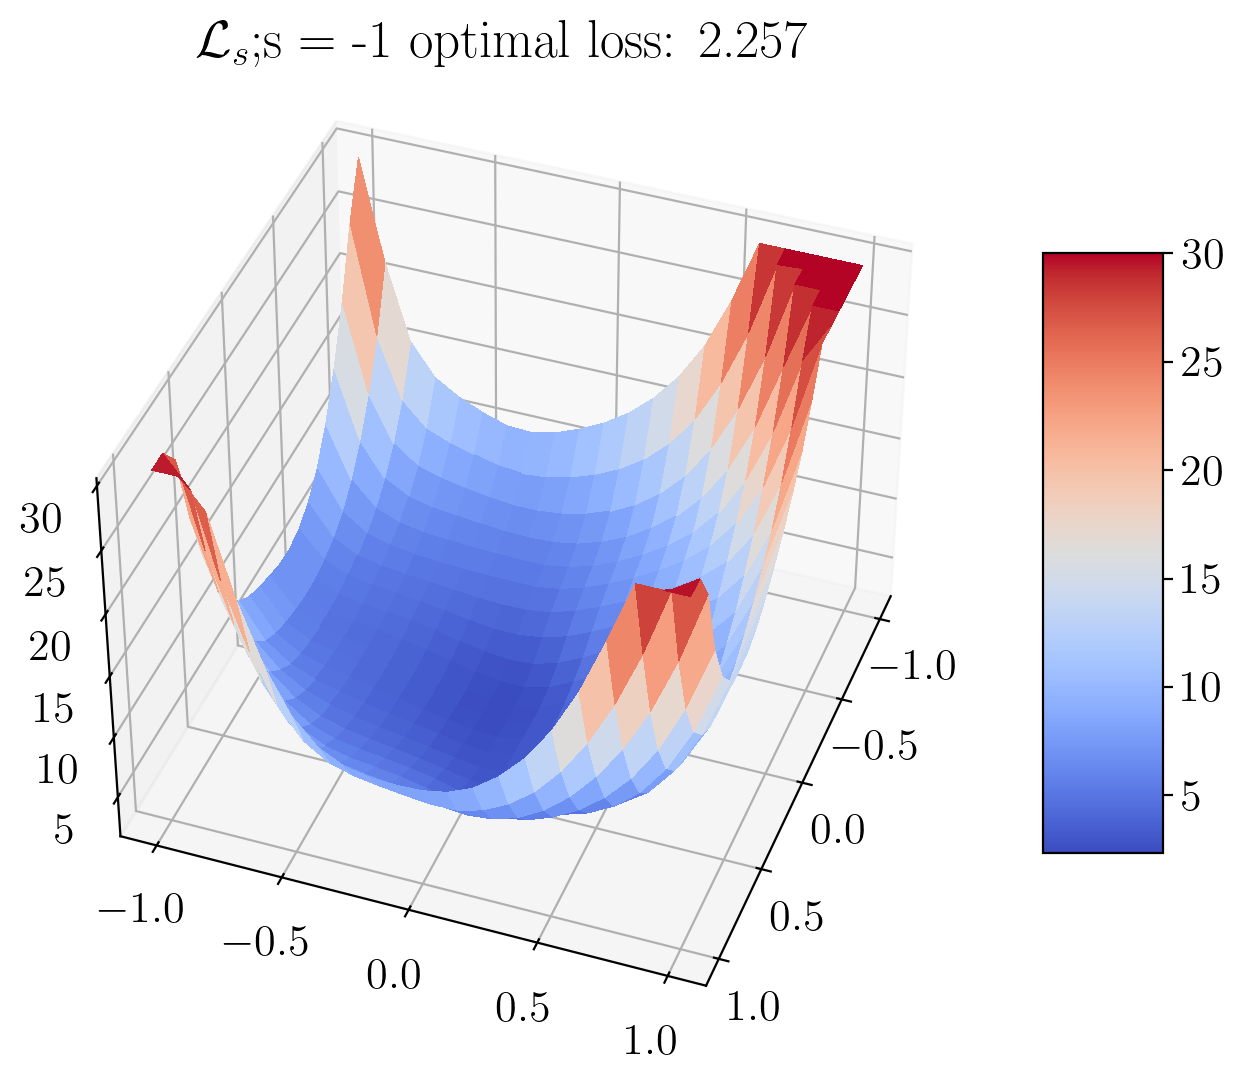

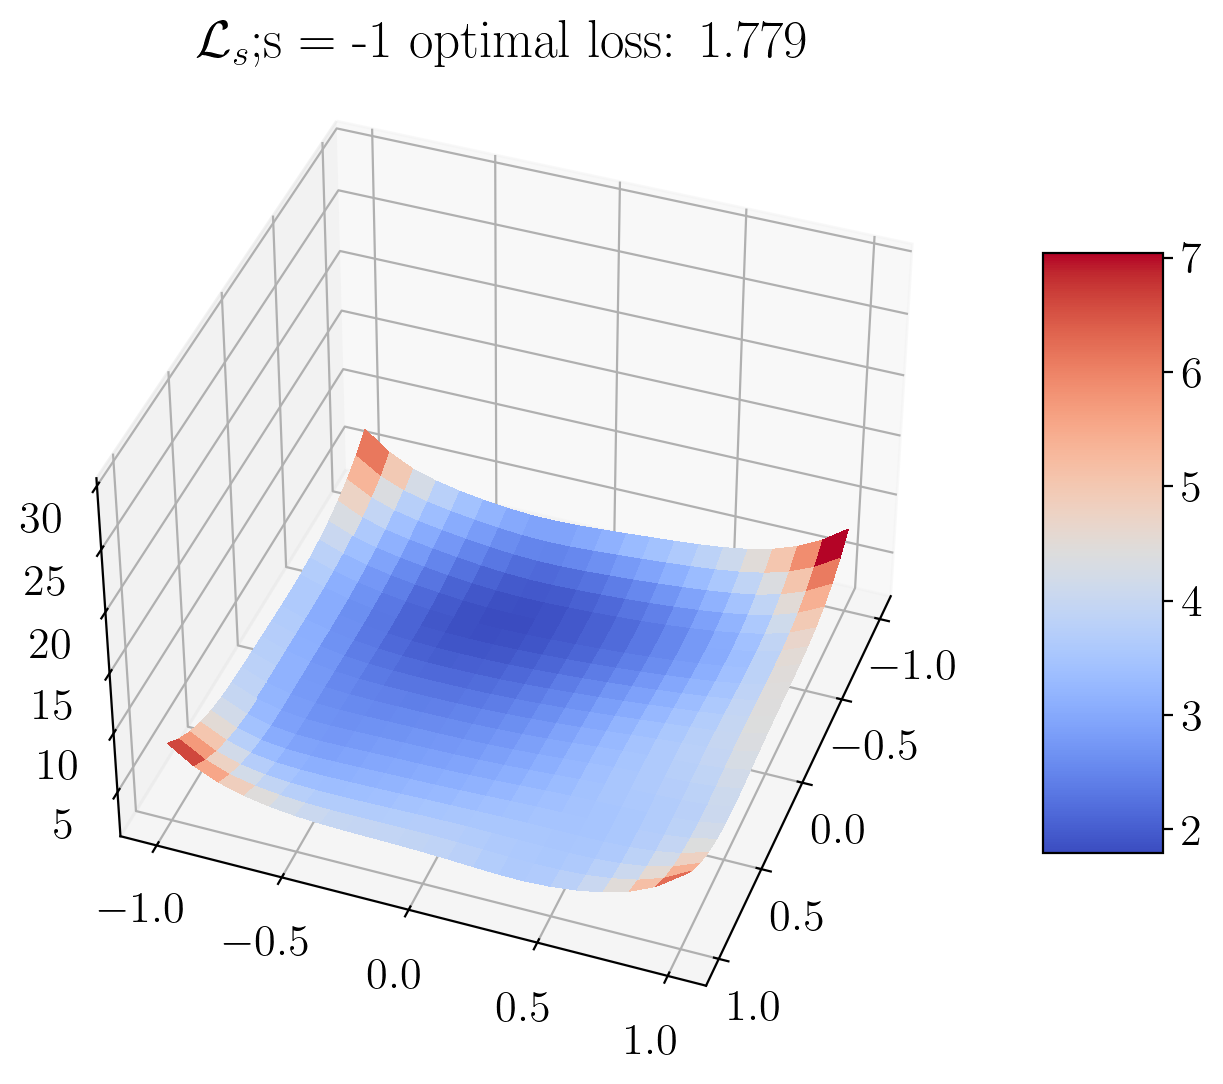

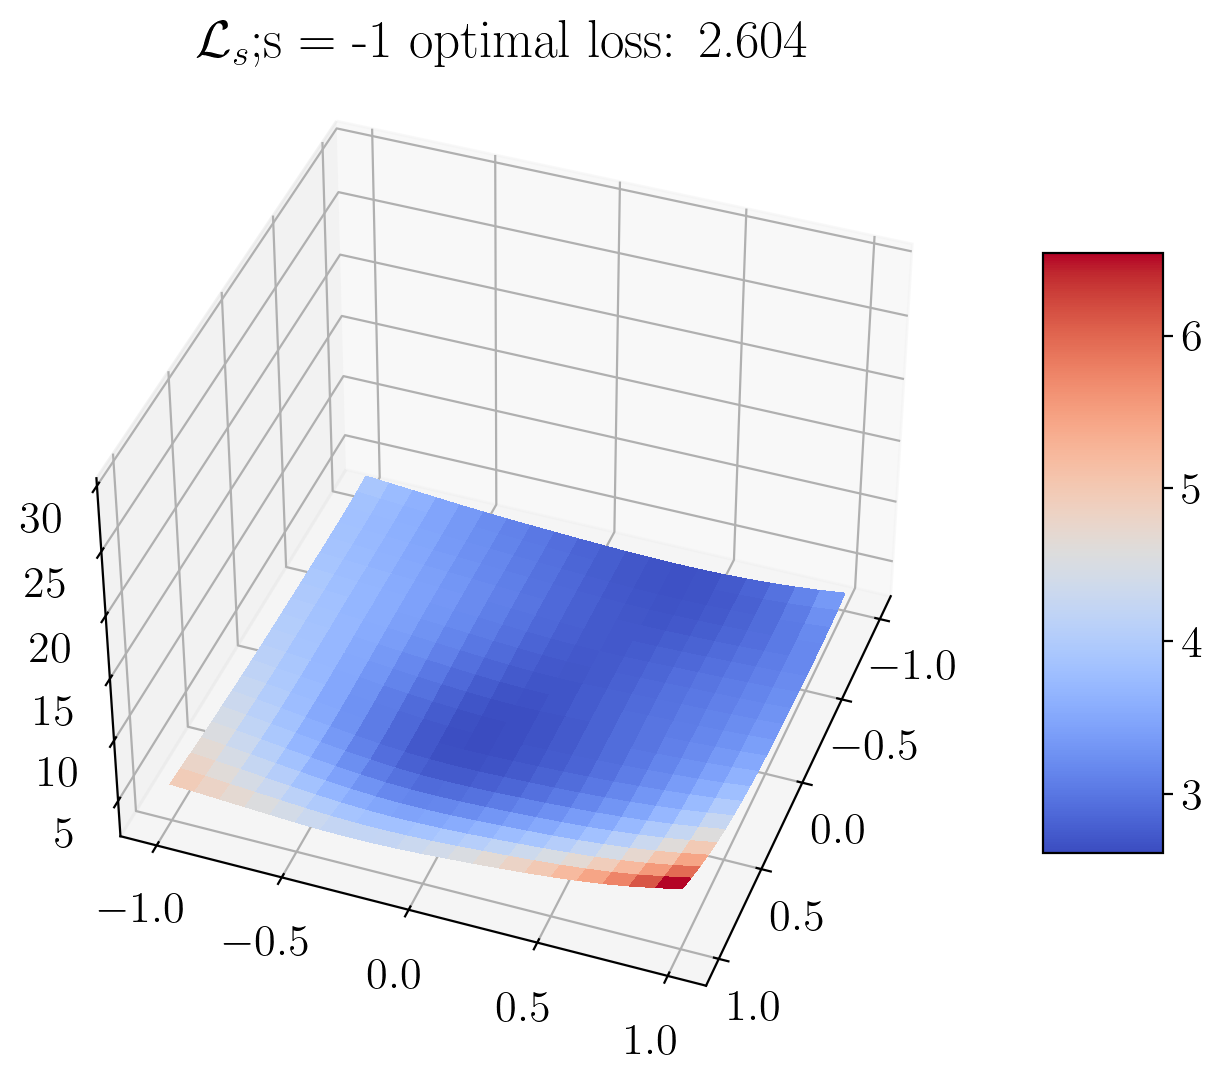

In [29]:
for vis in visualizers:
    vis.visualize(size = -1, z_grid_bounds=[-float('inf'), 30])

### Разные (у каждого свои) значения на осях

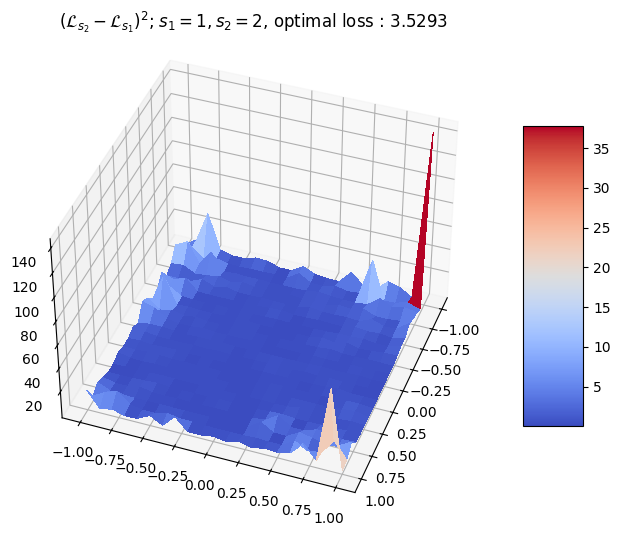

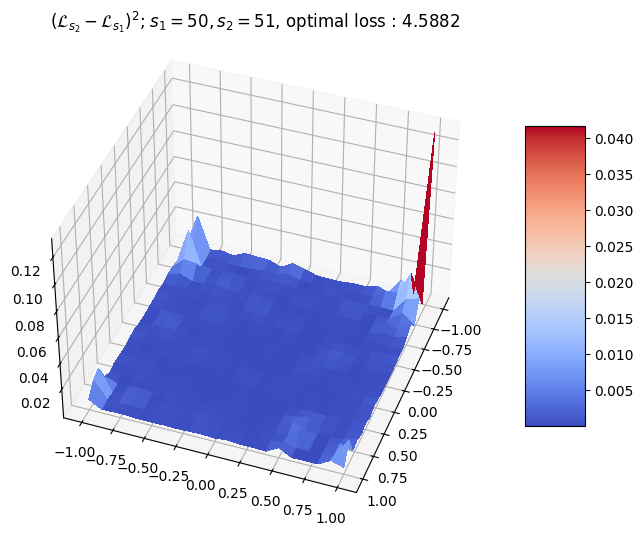

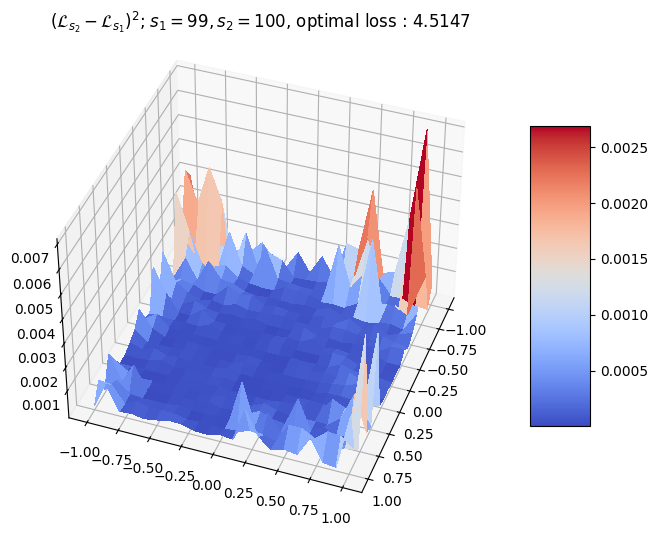

In [17]:
vis.visualize_diff(size1 = 1, size2 = 2, diff_type='square')
vis.visualize_diff(size1 = 50, size2 = 51, diff_type='square')
vis.visualize_diff(size1 = 99, size2 = 100, diff_type='square')

### Один масштаб (на осях общие значения) значения на осях

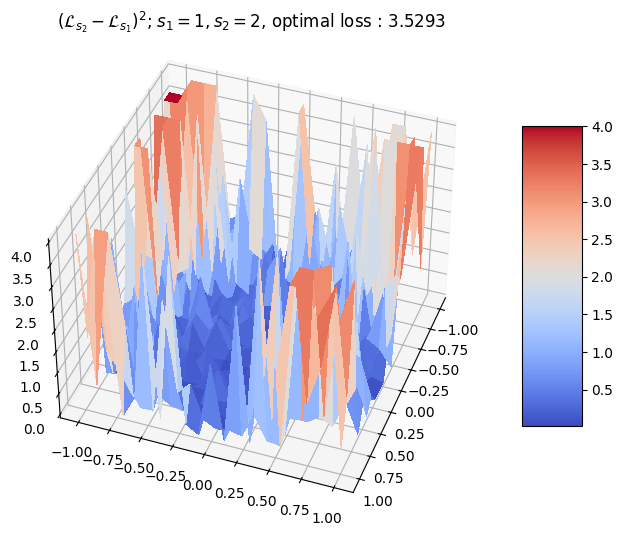

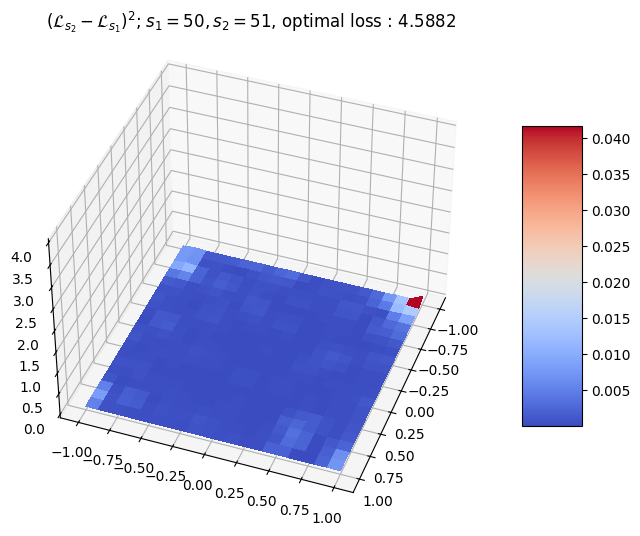

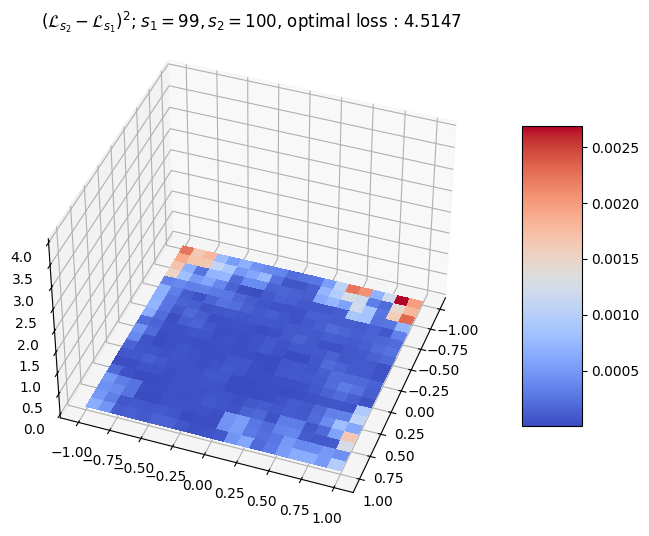

In [18]:
vis.visualize_diff(size1 = 1, size2 = 2, diff_type='square', bounds=[0, 4])
vis.visualize_diff(size1 = 50, size2 = 51, diff_type='square', bounds = [0, 4])
vis.visualize_diff(size1 = 99, size2 = 100, diff_type='square', bounds = [0, 4])

### Тоже самое с p(w)

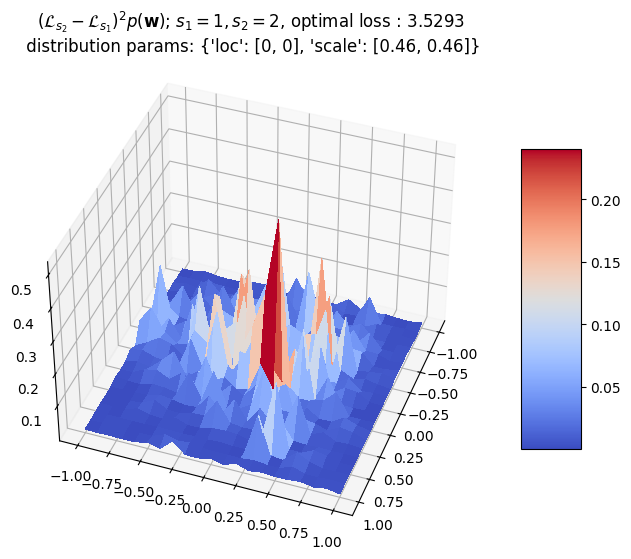

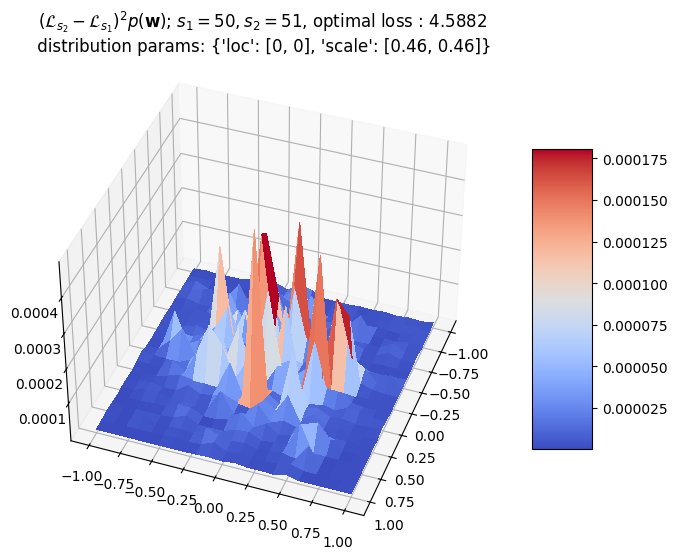

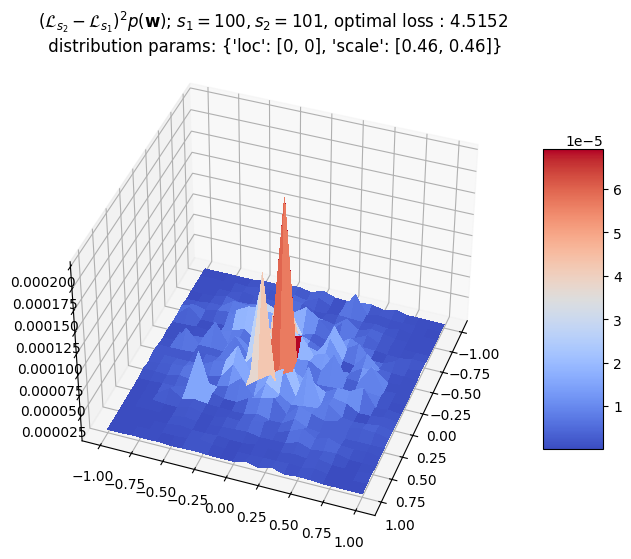

In [32]:
vis.visualize_diff(size1 = 1, 
                    size2 = 2, 
                    diff_type='square_dot_normal',
                    distrib_params = {'loc':[0,0], 'scale':[0.46, 0.46]})
vis.visualize_diff(size1 = 50, 
                    size2 = 51, 
                    diff_type='square_dot_normal',
                    distrib_params = {'loc':[0,0], 'scale':[0.46, 0.46]})
vis.visualize_diff(size1 = 100,
                    size2 = 101, 
                    diff_type='square_dot_normal',
                    distrib_params = {'loc':[0,0], 'scale':[0.46, 0.46]})

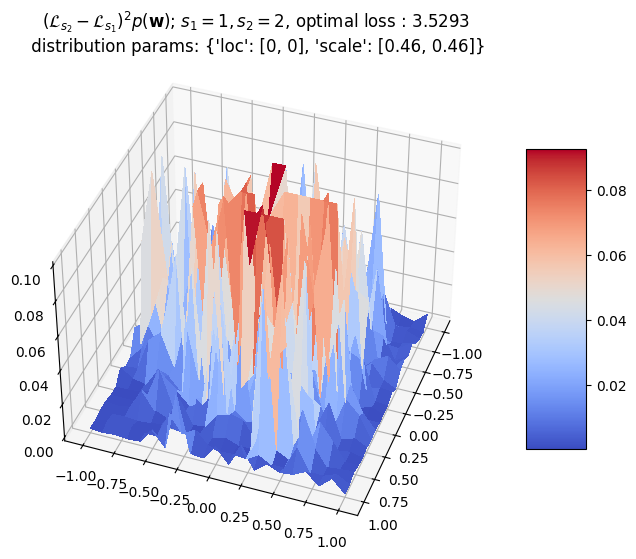

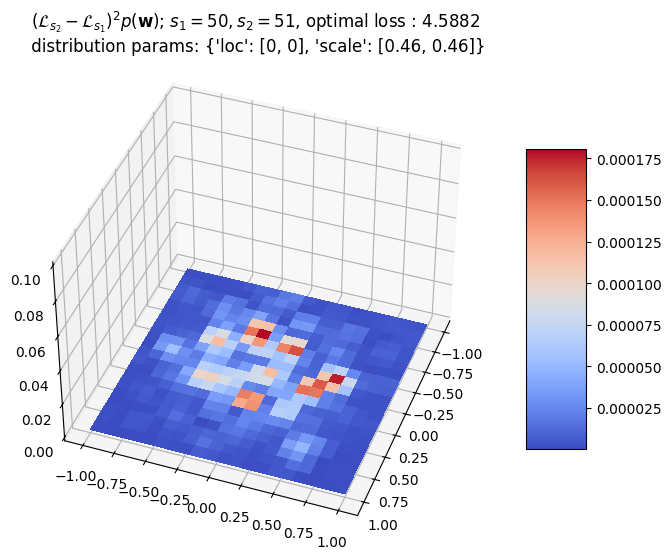

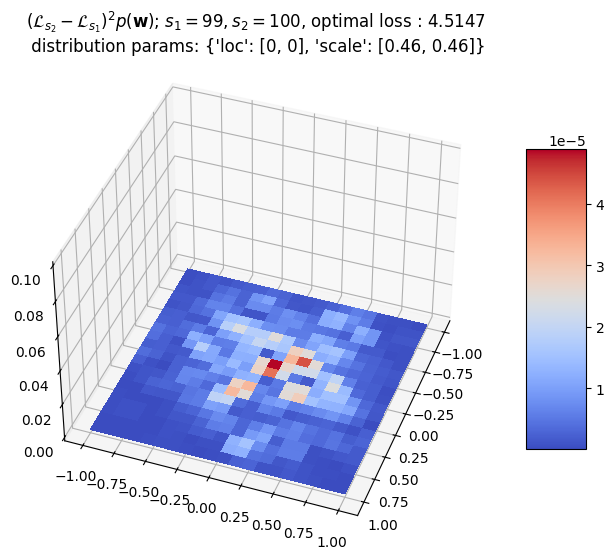

In [24]:
vis.visualize_diff(size1 = 1, 
                    size2 = 2, 
                    diff_type='square_dot_normal',
                    distrib_params = {'loc':[0,0], 'scale':[0.46, 0.46]},
                    bounds = [0, 0.1])
vis.visualize_diff(size1 = 50, 
                    size2 = 51, 
                    diff_type='square_dot_normal',
                    distrib_params = {'loc':[0,0], 'scale':[0.46, 0.46]},
                    bounds = [0, 0.1])
vis.visualize_diff(size1 = 99, 
                    size2 = 100, 
                    diff_type='square_dot_normal',
                    distrib_params = {'loc':[0,0], 'scale':[0.46, 0.46]},
                    bounds = [0, 0.1])

#### ImageNet

Files already downloaded and verified
Files already downloaded and verified


best_epoch: 5
best valid accuracy: 0.4467147435897436
best valid loss: 1.5743968303386981


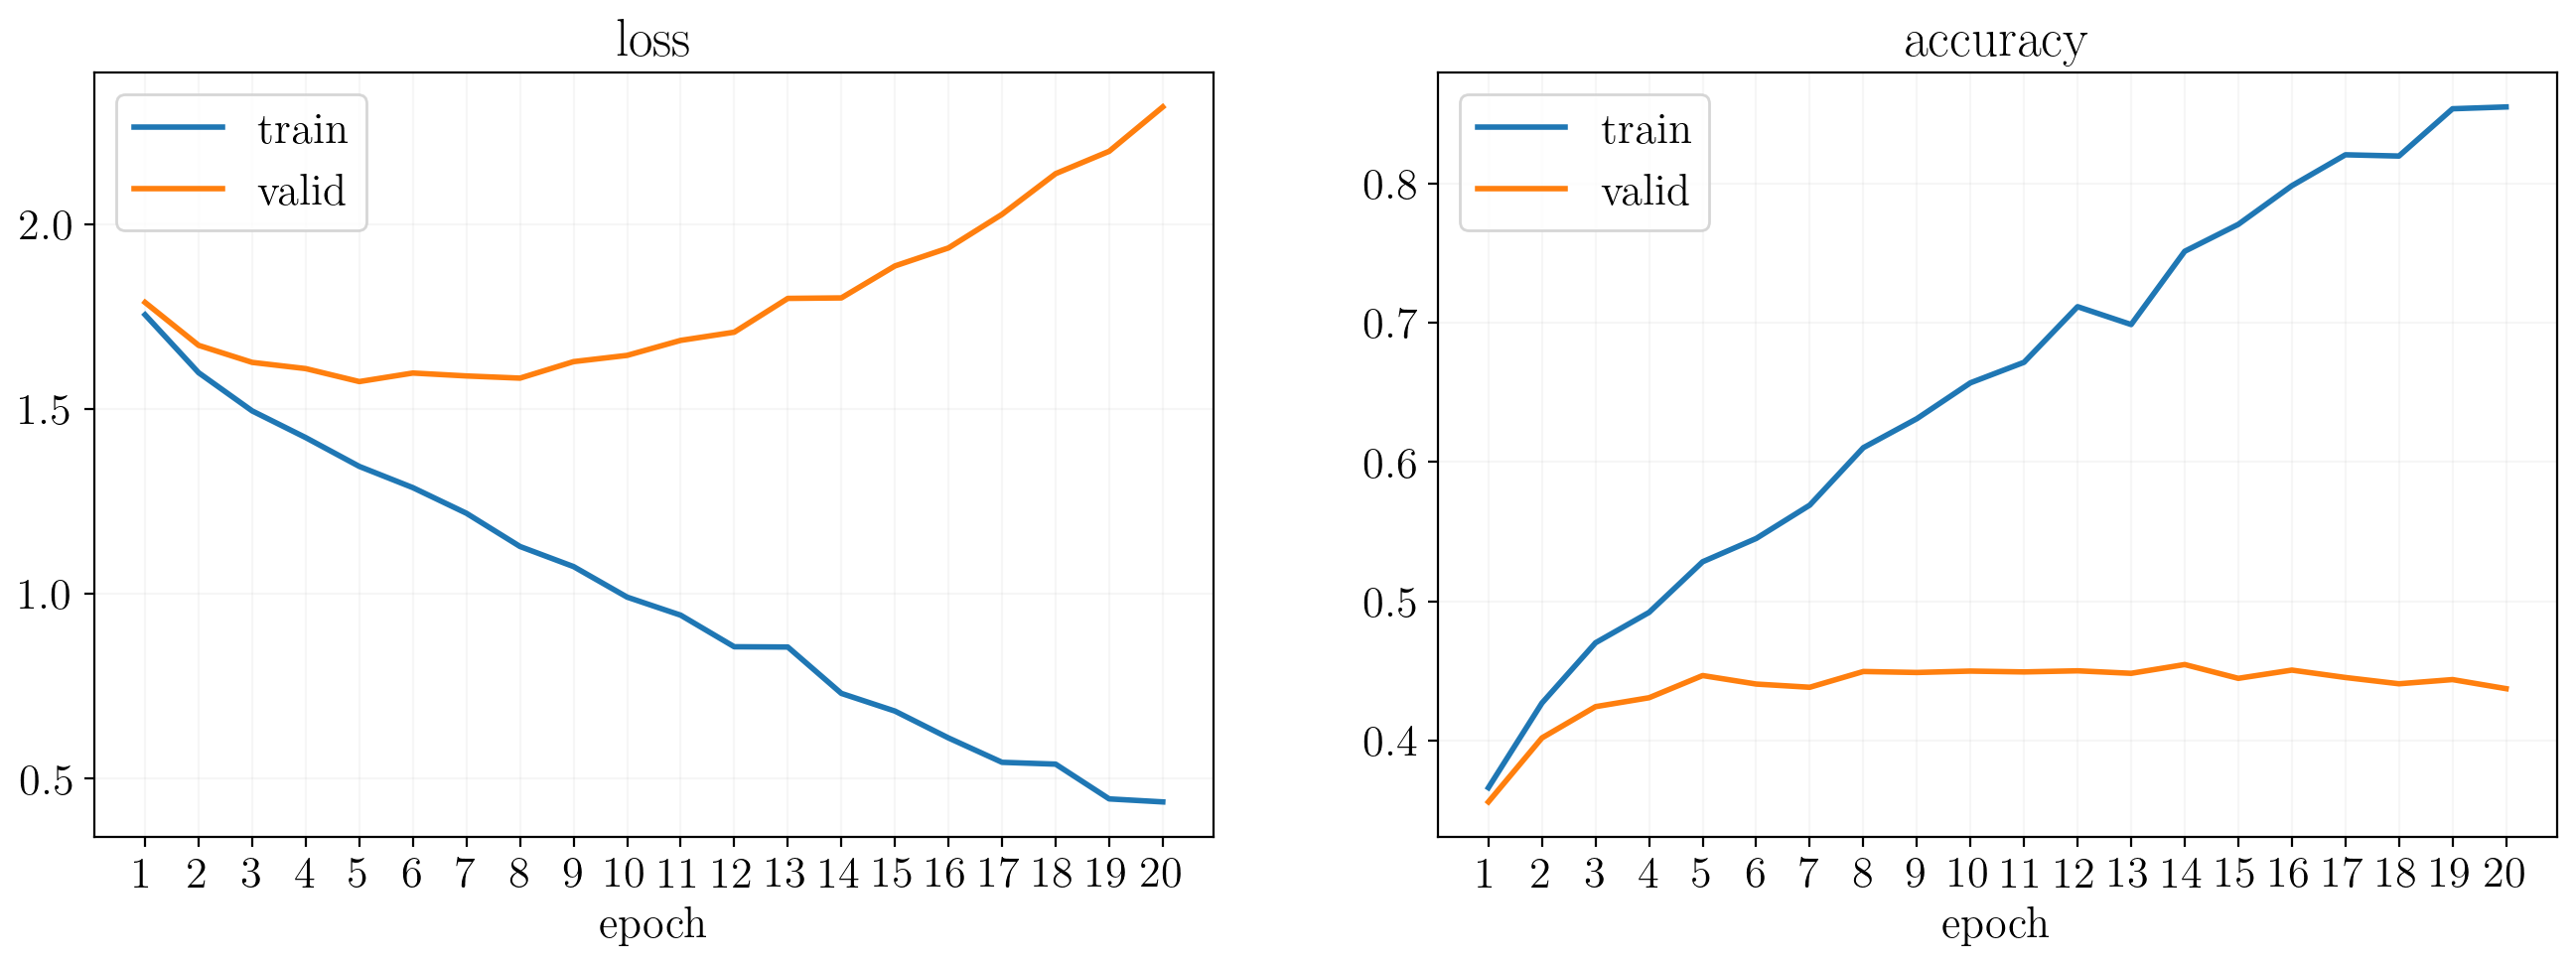